데이터 요약 정보:
           대리점_건수       파트너_건수        전체_건수        월정료_합계      지급수수료_합계
count    6.000000     6.000000     6.000000  6.000000e+00  6.000000e+00
mean   302.500000   570.333333   872.833333  6.766699e+07  2.711137e+08
std    204.360221   310.903629   428.330441  3.784692e+07  1.963435e+08
min    102.000000   209.000000   311.000000  3.217282e+07  9.776268e+07
25%    150.250000   413.500000   667.250000  3.976345e+07  1.320571e+08
50%    274.000000   553.000000   786.500000  5.791660e+07  1.837265e+08
75%    376.000000   596.500000  1086.500000  8.381990e+07  4.145138e+08
max    646.000000  1129.000000  1539.000000  1.318292e+08  5.551899e+08

결측치 확인:
구분          0
대리점_건수      0
파트너_건수      0
전체_건수       0
월정료_합계      0
지급수수료_합계    0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_16932\1666555981.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="전체_건수", data=df, palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\1666555981.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="월정료_합계", data=df, palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\1666555981.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="지급수수료_합계", data=df, palette="Greens_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\1666555981.

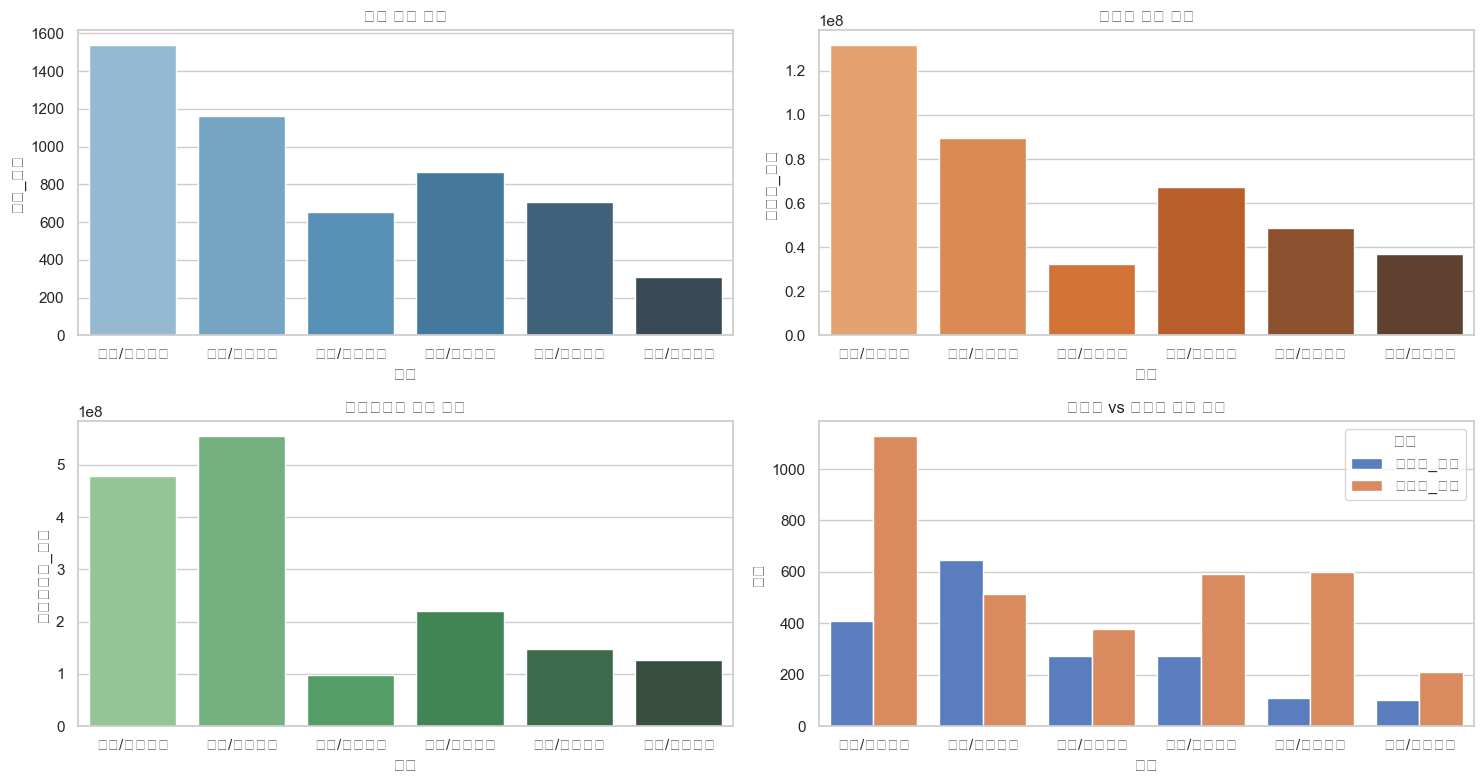

ValueError: could not convert string to float: '강남/서부본부'

<Figure size 1000x600 with 0 Axes>

In [3]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# 데이터 입력
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [410, 646, 274, 274, 109, 102],
    '파트너_건수': [1129, 514, 380, 592, 598, 209],
    '전체_건수': [1539, 1160, 654, 866, 707, 311],
    '월정료_합계': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '지급수수료_합계': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}

df = pd.DataFrame(data)

# 탐색적 데이터 분석 (EDA)
print("데이터 요약 정보:")
print(df.describe())
print("\n결측치 확인:")
print(df.isnull().sum())

# 시각화 설정
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# 전체 건수 비교
plt.subplot(2, 2, 1)
sns.barplot(x="구분", y="전체_건수", data=df, palette="Blues_d")
plt.title("전체 건수 비교")

# 월정료 합계
plt.subplot(2, 2, 2)
sns.barplot(x="구분", y="월정료_합계", data=df, palette="Oranges_d")
plt.title("월정료 합계 비교")

# 지급수수료 합계
plt.subplot(2, 2, 3)
sns.barplot(x="구분", y="지급수수료_합계", data=df, palette="Greens_d")
plt.title("지급수수료 합계 비교")

# 대리점 vs 파트너 건수
plt.subplot(2, 2, 4)
df_melt = pd.melt(df, id_vars='구분', value_vars=['대리점_건수', '파트너_건수'],
                  var_name='채널', value_name='건수')
sns.barplot(x="구분", y="건수", hue="채널", data=df_melt, palette="muted")
plt.title("대리점 vs 파트너 건수 비교")

plt.tight_layout()
plt.show()

# 상관관계 분석
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("상관관계 분석")
plt.show()

# 효율성 순위 도출
df['대리점_효율'] = df['월정료_합계'] / df['대리점_건수']
df['파트너_효율'] = df['월정료_합계'] / df['파트너_건수']
efficiency_rank = df[['구분', '대리점_효율', '파트너_효율']].sort_values(by='대리점_효율', ascending=False)
print("\n효율성 순위:")
print(efficiency_rank)

데이터 요약:
         대리점_건수      파트너_건수       전체_건수        실적_건수        실적_월정료  \
count  6.000000    6.000000    6.000000     6.000000  6.000000e+00   
mean   5.166667   86.000000   91.166667   872.833333  6.766699e+07   
std    1.940790   43.781275   42.357605   428.330441  3.784692e+07   
min    2.000000   36.000000   41.000000   311.000000  3.217282e+07   
25%    4.250000   52.000000   59.000000   667.250000  3.976345e+07   
50%    5.500000   82.000000   88.500000   786.500000  5.791660e+07   
75%    6.750000  118.750000  123.250000  1086.500000  8.381990e+07   
max    7.000000  143.000000  145.000000  1539.000000  1.318292e+08   

           실적_지급수수료     평균_건수        평균_월정료      평균_지급수수료  
count  6.000000e+00   6.00000  6.000000e+00  6.000000e+00  
mean   2.711137e+08  11.00000  8.553808e+05  3.072016e+06  
std    1.963435e+08   6.60303  5.316870e+05  2.236059e+06  
min    9.776268e+07   5.00000  3.356390e+05  1.012705e+06  
25%    1.320571e+08   6.25000  4.612772e+05  1.446746e+06  
5

C:\Users\User\AppData\Local\Temp\ipykernel_16932\3672787302.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3672787302.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3672787302.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3672787302.

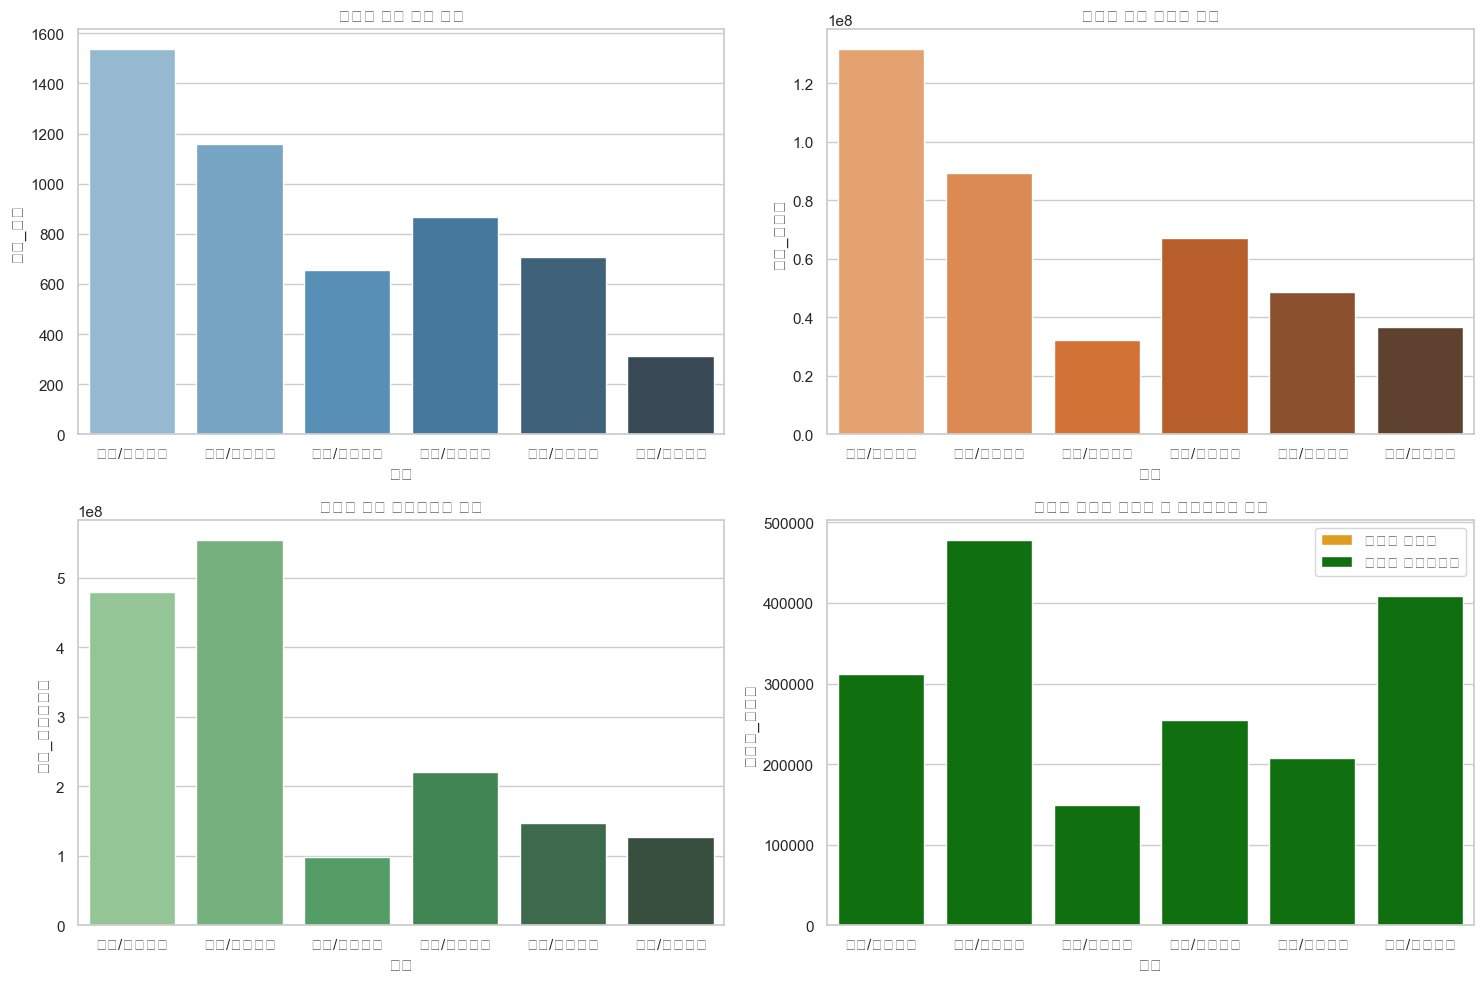


본부별 효율성 순위:
        구분        건수당_월정료      건수당_지급수수료
5  충남/충북본부  118292.700965  408774.173633
0  강남/서부본부   85658.977908  311337.315789
3  부산/경남본부   77536.374134  254746.769053
1  강북/강원본부   77049.741379  478611.982759
4  전남/전북본부   68863.797737  207697.666195
2  대구/경북본부   49193.911315  149484.224771

본부: 강남/서부본부
실적 건수: 1539 | 평균 월정료: 983,800 | 평균 지급수수료: 3,575,732
부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.
잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.

본부: 강북/강원본부
실적 건수: 1160 | 평균 월정료: 1,787,554 | 평균 지급수수료: 7,103,798
부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.
잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.

본부: 대구/경북본부
실적 건수: 654 | 평균 월정료: 353,542 | 평균 지급수수료: 1,073,915
부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.
잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.

본부: 부산/경남본부
실적 건수: 866 | 평균 월정료: 784,483 | 평균 지급수수료: 2,565,241
부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.
잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.

본부: 전남/전북본부
실적 건수: 707 | 평균 월정료: 335,639 | 평균 지급수수료: 1,012,705
부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.
잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.

본부: 충남/충북본부
실적 건수: 311 | 평균 월정료: 887,267 | 평균 지급수수료: 3,

In [5]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 입력
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '전체_건수': [134, 50, 91, 86, 145, 41],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
    '평균_건수': [11, 23, 5, 10, 5, 12],
    '평균_월정료': [983800, 1787554, 353542, 784483, 335639, 887267],
    '평균_지급수수료': [3575732, 7103798, 1073915, 2565241, 1012705, 3100702],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 한글 폰트 설정 (Windows)
plt.rc('font', family='Malgun Gothic')  # 맑은 고딕 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 요약 및 결측치 확인
print("데이터 요약:")
print(df.describe())
print("\n결측치 확인:")
print(df.isnull().sum())

# 효율성 계산
df['건수당_월정료'] = df['실적_월정료'] / df['실적_건수']
df['건수당_지급수수료'] = df['실적_지급수수료'] / df['실적_건수']

# 시각화 설정
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# 1. 본부별 전체 건수 비교
plt.subplot(2, 2, 1)
sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
plt.title("본부별 실적 건수 비교")

# 2. 본부별 실적 월정료 비교
plt.subplot(2, 2, 2)
sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
plt.title("본부별 실적 월정료 비교")

# 3. 본부별 실적 지급수수료 비교
plt.subplot(2, 2, 3)
sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
plt.title("본부별 실적 지급수수료 비교")

# 4. 건수당 월정료 및 지급수수료 비교
plt.subplot(2, 2, 4)
sns.barplot(x="구분", y="건수당_월정료", data=df, color="orange", label="건수당 월정료")
sns.barplot(x="구분", y="건수당_지급수수료", data=df, color="green", label="건수당 지급수수료")
plt.title("본부별 건수당 월정료 및 지급수수료 비교")
plt.legend()

plt.tight_layout()
plt.show()

# 효율성 순위
efficiency_rank = df[['구분', '건수당_월정료', '건수당_지급수수료']].sort_values(by='건수당_월정료', ascending=False)
print("\n본부별 효율성 순위:")
print(efficiency_rank)

# 잘하는 점, 부족한 점 및 개선안 도출
for idx, row in df.iterrows():
    print(f"\n본부: {row['구분']}")
    print(f"실적 건수: {row['실적_건수']} | 평균 월정료: {row['평균_월정료']:,} | 평균 지급수수료: {row['평균_지급수수료']:,}")
    if row['건수당_월정료'] > 1000000:
        print("잘하는 점: 높은 건수당 월정료를 기록하고 있습니다.")
    else:
        print("부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.")
    if row['건수당_지급수수료'] > 5000000:
        print("부족한 점: 지급수수료 부담이 큽니다. 비용 효율화가 필요합니다.")
    else:
        print("잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.")

C:\Users\User\AppData\Local\Temp\ipykernel_16932\2589359858.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\2589359858.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\2589359858.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\2589359858.

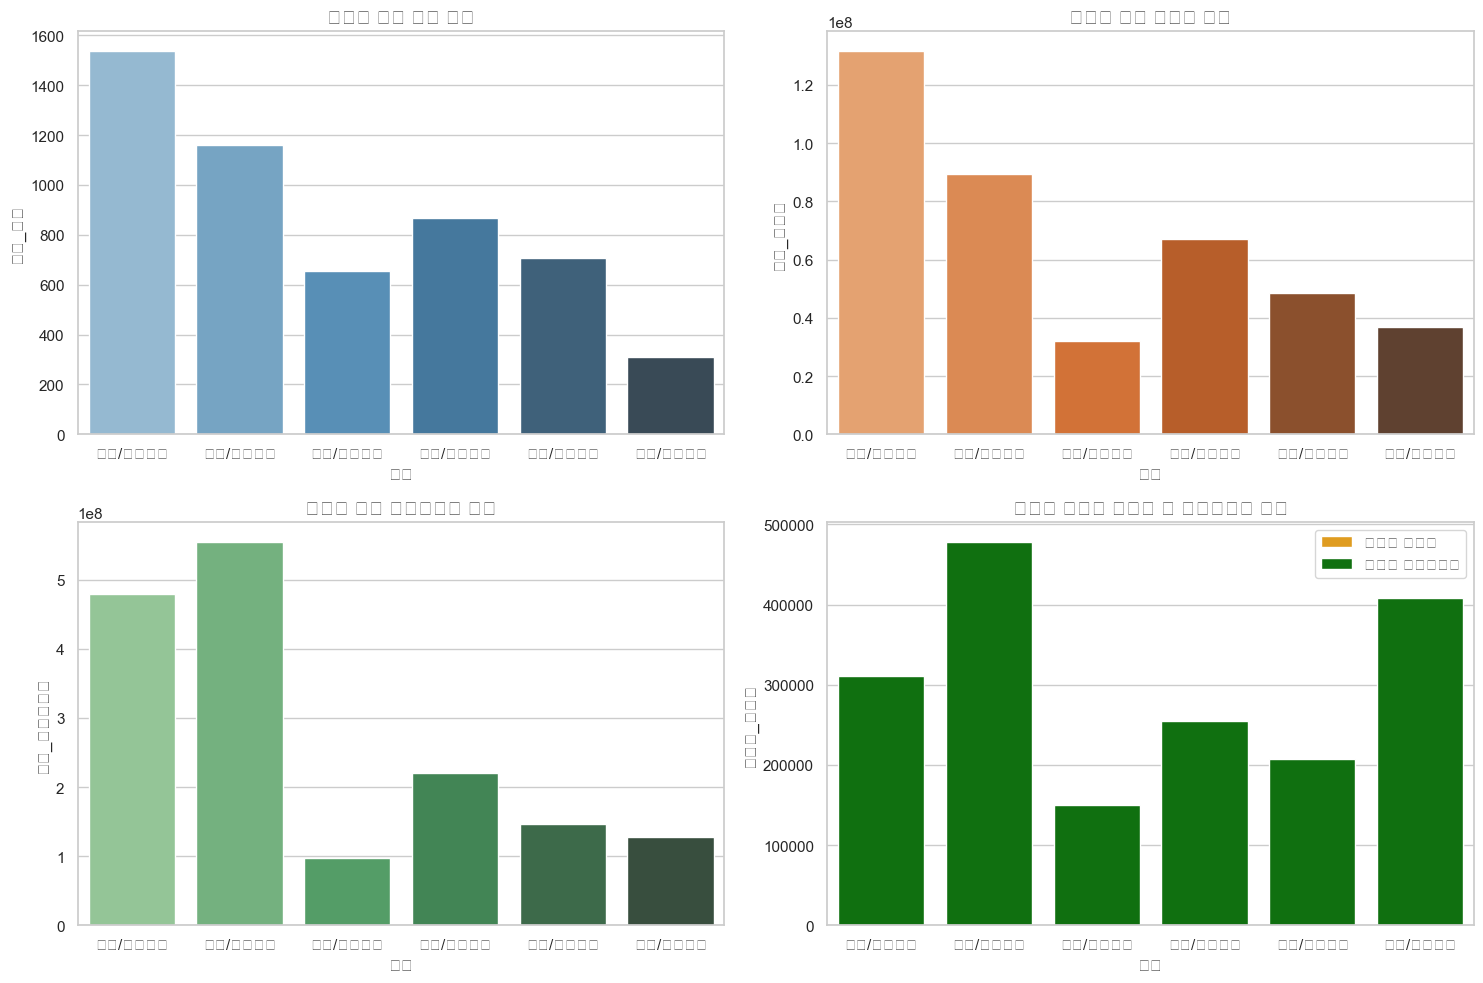

In [7]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 입력
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '전체_건수': [134, 50, 91, 86, 145, 41],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
    '평균_건수': [11, 23, 5, 10, 5, 12],
    '평균_월정료': [983800, 1787554, 353542, 784483, 335639, 887267],
    '평균_지급수수료': [3575732, 7103798, 1073915, 2565241, 1012705, 3100702],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 한글 폰트 설정 (Windows)
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 적용
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 효율성 계산
df['건수당_월정료'] = df['실적_월정료'] / df['실적_건수']
df['건수당_지급수수료'] = df['실적_지급수수료'] / df['실적_건수']

# 시각화 설정
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# 1. 본부별 전체 건수 비교
plt.subplot(2, 2, 1)
sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
plt.title("본부별 실적 건수 비교", fontsize=14)

# 2. 본부별 실적 월정료 비교
plt.subplot(2, 2, 2)
sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
plt.title("본부별 실적 월정료 비교", fontsize=14)

# 3. 본부별 실적 지급수수료 비교
plt.subplot(2, 2, 3)
sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
plt.title("본부별 실적 지급수수료 비교", fontsize=14)

# 4. 건수당 월정료 및 지급수수료 비교
plt.subplot(2, 2, 4)
sns.barplot(x="구분", y="건수당_월정료", data=df, color="orange", label="건수당 월정료")
sns.barplot(x="구분", y="건수당_지급수수료", data=df, color="green", label="건수당 지급수수료")
plt.title("본부별 건수당 월정료 및 지급수수료 비교", fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
import matplotlib.font_manager as fm

# 설치된 폰트 리스트 출력
font_list = [f.name for f in fm.fontManager.ttflist]
print(font_list)

['DejaVu Sans Display', 'cmmi10', 'DejaVu Serif', 'DejaVu Sans Mono', 'cmss10', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Sans', 'cmr10', 'cmsy10', 'STIXGeneral', 'DejaVu Serif', 'STIXNonUnicode', 'STIXSizeTwoSym', 'DejaVu Serif', 'cmb10', 'STIXSizeFourSym', 'cmtt10', 'STIXGeneral', 'STIXSizeFourSym', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'STIXGeneral', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans', 'STIXSizeThreeSym', 'STIXSizeOneSym', 'STIXNonUnicode', 'STIXSizeThreeSym', 'STIXSizeFiveSym', 'DejaVu Serif Display', 'STIXSizeOneSym', 'cmex10', 'STIXNonUnicode', 'STIXGeneral', 'DejaVu Sans Mono', 'DejaVu Sans', 'Microsoft YaHei', 'High Tower Text', 'Tahoma', 'Microsoft JhengHei', 'Constantia', 'Segoe UI', 'Century Schoolbook', 'Verdana', 'Candara', 'Playbill', 'Californian FB', 'Viner Hand ITC', 'Georgia', 'KoPubDotum', 'Segoe UI', 'LG Smart UI', 'Rage Italic', 'Tw Cen MT Condensed Extra Bold', 'Elephant', 'Jokerman', 'Perpetua Titling MT', 'Times New Roman', 'Microsoft PhagsPa', 'Ma

C:\Users\User\AppData\Local\Temp\ipykernel_16932\530418759.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\530418759.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\530418759.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:61:

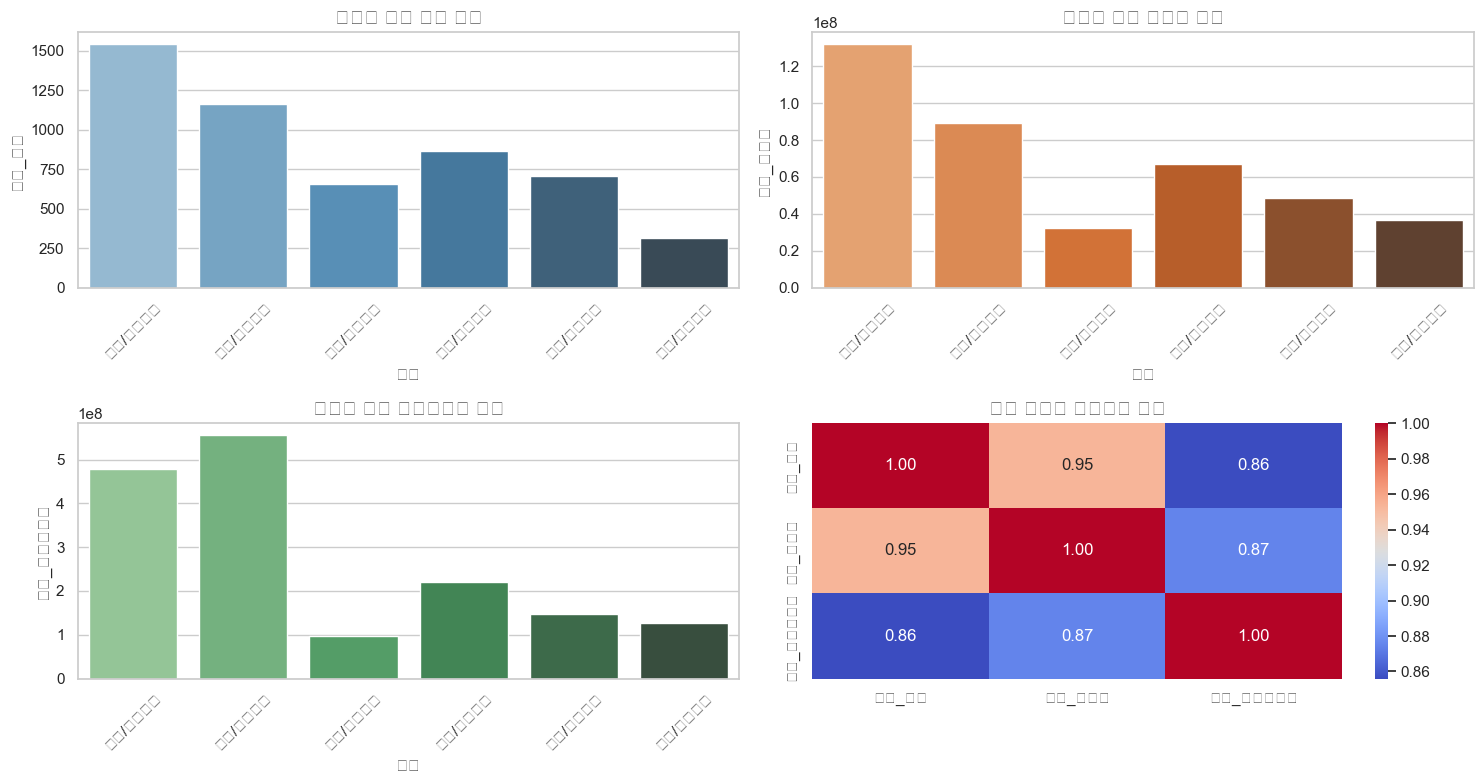

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  # '맑은 고딕' 경로
font_prop = fm.FontProperties(fname=font_path)

# matplotlib 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 입력
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}

df = pd.DataFrame(data)

# 시각화 설정
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))

# 1. 본부별 실적 건수 비교
plt.subplot(2, 2, 1)
sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
plt.title("본부별 실적 건수 비교", fontsize=14)
plt.xticks(rotation=45)

# 2. 본부별 실적 월정료 비교
plt.subplot(2, 2, 2)
sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
plt.title("본부별 실적 월정료 비교", fontsize=14)
plt.xticks(rotation=45)

# 3. 본부별 실적 지급수수료 비교
plt.subplot(2, 2, 3)
sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
plt.title("본부별 실적 지급수수료 비교", fontsize=14)
plt.xticks(rotation=45)

# 4. 상관관계 분석 (히트맵)
plt.subplot(2, 2, 4)
sns.heatmap(df.drop(columns='구분').corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("실적 데이터 상관관계 분석", fontsize=14)

plt.tight_layout()
plt.show()

In [37]:
rm -rf ~/.cache/matplotlib

'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [43]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 경로 확인 (Windows 기본 폰트 사용 예시)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Malgun Gothic 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# matplotlib 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [51]:
font_path = 'D:/네이버 글꼴/나눔 글꼴/나눔고딕에코/NanumFontSetup_OTF_GOTHICECO/NanumGothicEco.otf'  # 나눔고딕 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

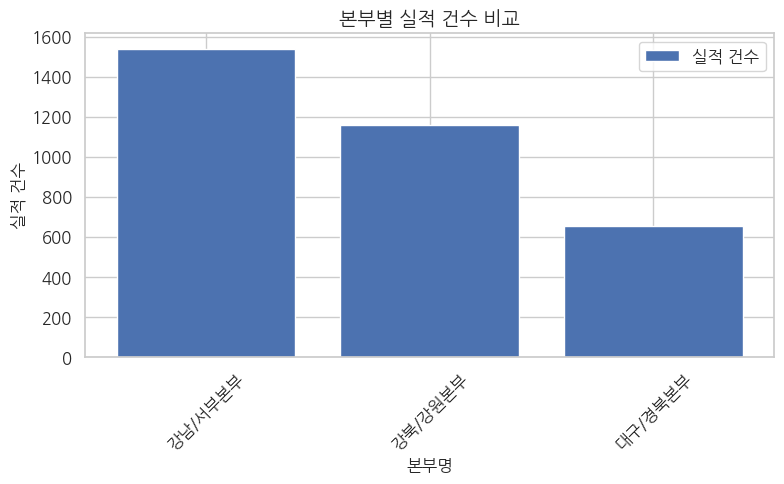

In [57]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = 'D:/네이버 글꼴/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf'  # 정확한 경로 확인
font_prop = fm.FontProperties(fname=font_path)

# 그래프 그리기
plt.figure(figsize=(8, 5))

# 막대그래프
plt.bar(["강남/서부본부", "강북/강원본부", "대구/경북본부"], [1539, 1160, 654], label="실적 건수")

# x, y 레이블과 제목에 폰트 적용
plt.xlabel("본부명", fontproperties=font_prop, fontsize=12)
plt.ylabel("실적 건수", fontproperties=font_prop, fontsize=12)
plt.title("본부별 실적 건수 비교", fontproperties=font_prop, fontsize=14)

# 범례에 폰트 적용
plt.legend(prop=font_prop)

# 눈금에도 폰트 적용
plt.xticks(fontproperties=font_prop, rotation=45)  # x축 눈금 회전
plt.yticks(fontproperties=font_prop)

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16932\3410784905.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3410784905.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3410784905.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3410784905.

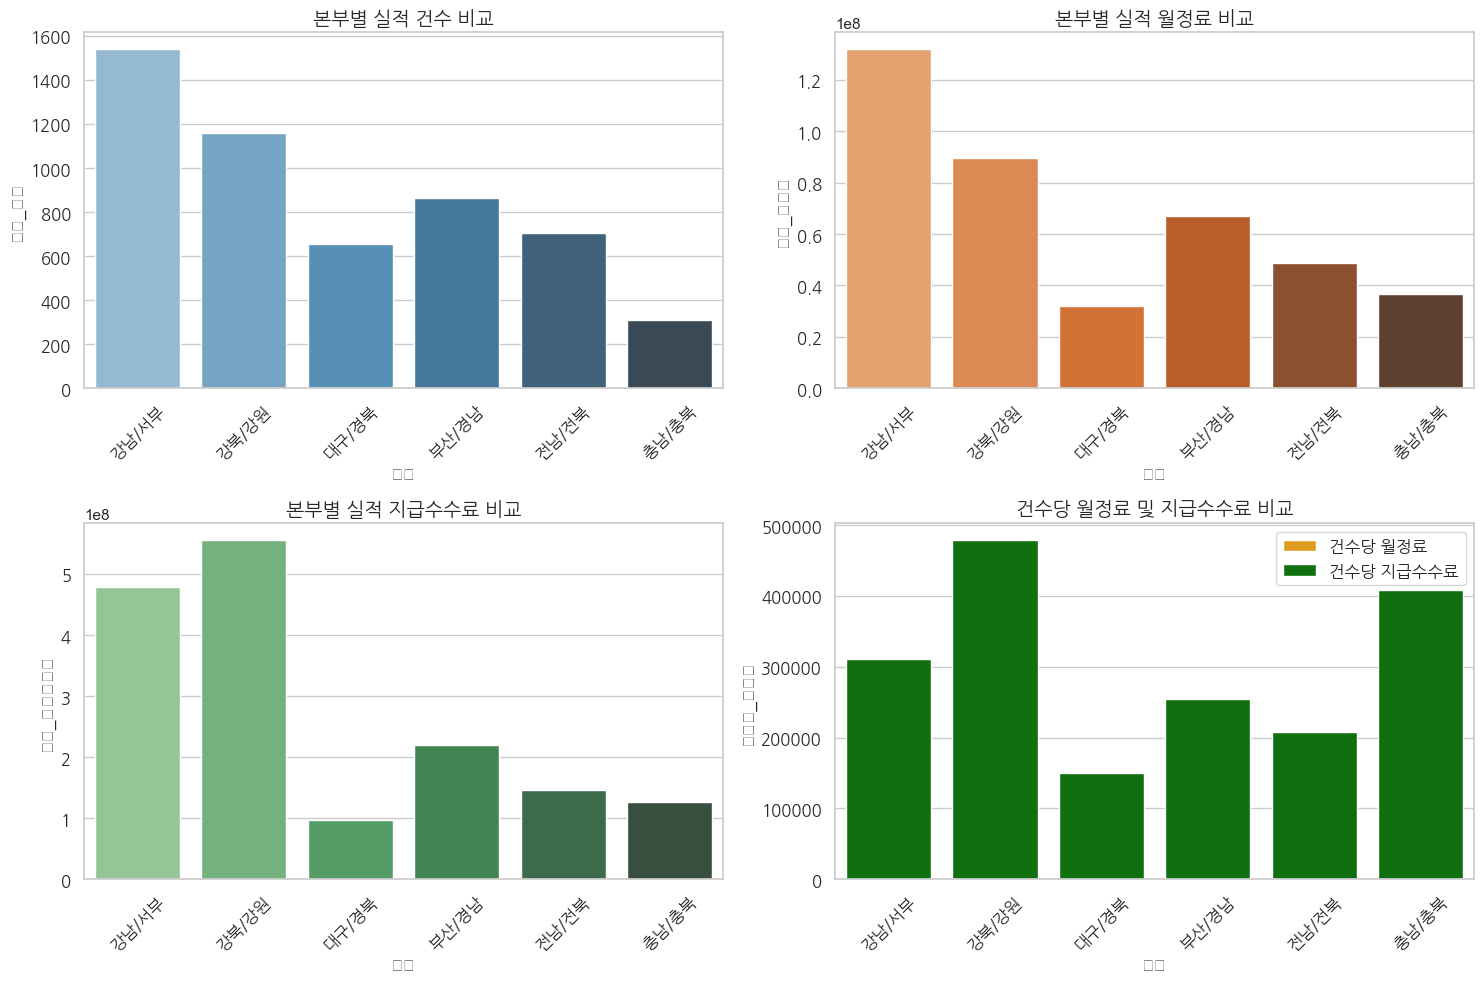

ValueError: could not convert string to float: '강남/서부'

<Figure size 1000x600 with 0 Axes>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm


# 나눔고딕 폰트 경로 설정
font_path = 'D:/네이버 글꼴/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf'  # 정확한 경로 확인
font_prop = fm.FontProperties(fname=font_path)

# 데이터 입력
data = {
    '구분': ['강남/서부', '강북/강원', '대구/경북', '부산/경남', '전남/전북', '충남/충북'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '전체_건수': [134, 50, 91, 86, 145, 41],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 효율성 계산
df['건수당_월정료'] = df['실적_월정료'] / df['실적_건수']
df['건수당_지급수수료'] = df['실적_지급수수료'] / df['실적_건수']

# 시각화 설정
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# 1. 본부별 실적 건수 비교
plt.subplot(2, 2, 1)
sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
plt.title("본부별 실적 건수 비교", fontproperties=font_prop, fontsize=14)
plt.xticks(fontproperties=font_prop, rotation=45)
plt.yticks(fontproperties=font_prop)

# 2. 본부별 실적 월정료 비교
plt.subplot(2, 2, 2)
sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
plt.title("본부별 실적 월정료 비교", fontproperties=font_prop, fontsize=14)
plt.xticks(fontproperties=font_prop, rotation=45)
plt.yticks(fontproperties=font_prop)

# 3. 본부별 실적 지급수수료 비교
plt.subplot(2, 2, 3)
sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
plt.title("본부별 실적 지급수수료 비교", fontproperties=font_prop, fontsize=14)
plt.xticks(fontproperties=font_prop, rotation=45)
plt.yticks(fontproperties=font_prop)

# 4. 건수당 월정료 및 지급수수료 비교
plt.subplot(2, 2, 4)
sns.barplot(x="구분", y="건수당_월정료", data=df, color="orange", label="건수당 월정료")
sns.barplot(x="구분", y="건수당_지급수수료", data=df, color="green", label="건수당 지급수수료")
plt.title("건수당 월정료 및 지급수수료 비교", fontproperties=font_prop, fontsize=14)
plt.legend(prop=font_prop)
plt.xticks(fontproperties=font_prop, rotation=45)
plt.yticks(fontproperties=font_prop)

plt.tight_layout()
plt.show()

# 상관관계 분석 히트맵
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("실적 데이터 상관관계 분석", fontproperties=font_prop, fontsize=16)
plt.xticks(fontproperties=font_prop, rotation=45)
plt.yticks(fontproperties=font_prop, rotation=0)
plt.show()

# 효율성 순위 출력
efficiency_rank = df[['구분', '건수당_월정료', '건수당_지급수수료']].sort_values(by='건수당_월정료', ascending=False)
print("\n본부별 효율성 순위 (건수당 월정료 기준):")
print(efficiency_rank)

C:\Users\User\AppData\Local\Temp\ipykernel_16932\3849812058.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3849812058.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3849812058.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
findfont: Font family 'NanumGothicOTF' not found.
findfont: 

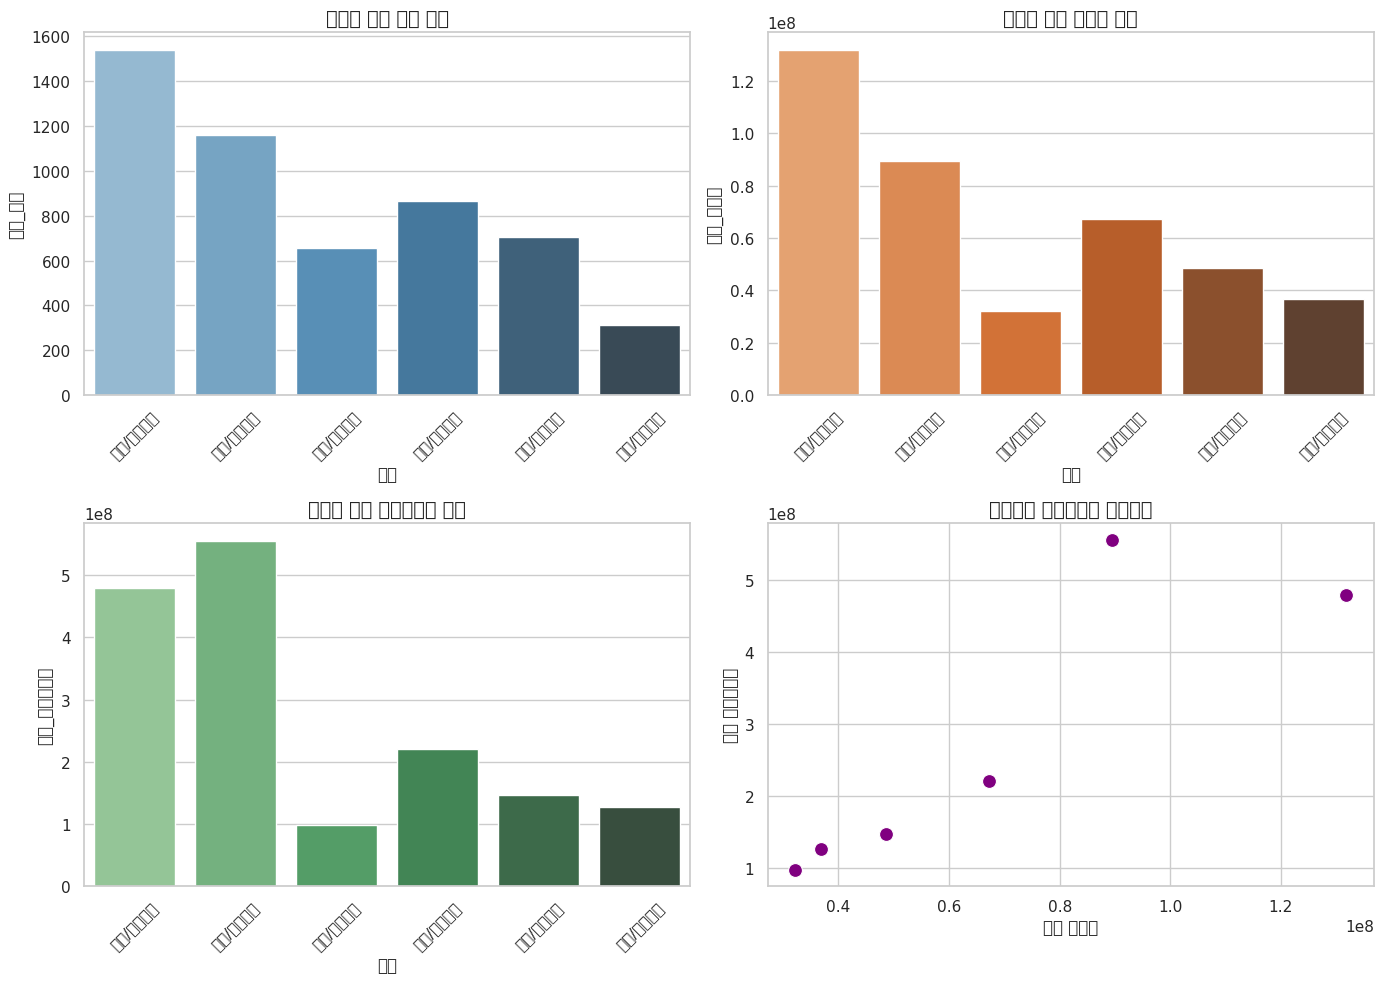

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = 'D:/네이버 글꼴/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf'  # 정확한 경로 확인
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 입력
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}
df = pd.DataFrame(data)

# 시각화 스타일 설정
sns.set(style="whitegrid", palette="muted", font=font_prop.get_name())
plt.figure(figsize=(14, 10))

# 1. 실적 건수 비교
plt.subplot(2, 2, 1)
sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
plt.title("본부별 실적 건수 비교", fontsize=14)
plt.xticks(rotation=45)

# 2. 실적 월정료 비교
plt.subplot(2, 2, 2)
sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
plt.title("본부별 실적 월정료 비교", fontsize=14)
plt.xticks(rotation=45)

# 3. 실적 지급수수료 비교
plt.subplot(2, 2, 3)
sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
plt.title("본부별 실적 지급수수료 비교", fontsize=14)
plt.xticks(rotation=45)

# 4. 월정료와 지급수수료 상관관계
plt.subplot(2, 2, 4)
sns.scatterplot(x="실적_월정료", y="실적_지급수수료", data=df, s=100, color="purple")
plt.title("월정료와 지급수수료 상관관계", fontsize=14)
plt.xlabel("실적 월정료")
plt.ylabel("실적 지급수수료")

# 그래프 레이아웃 최적화
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16932\2923652879.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Count", data=df, palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\2923652879.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Fee", data=df, palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\2923652879.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Region", y="Commission", data=df, palette="Greens_d")


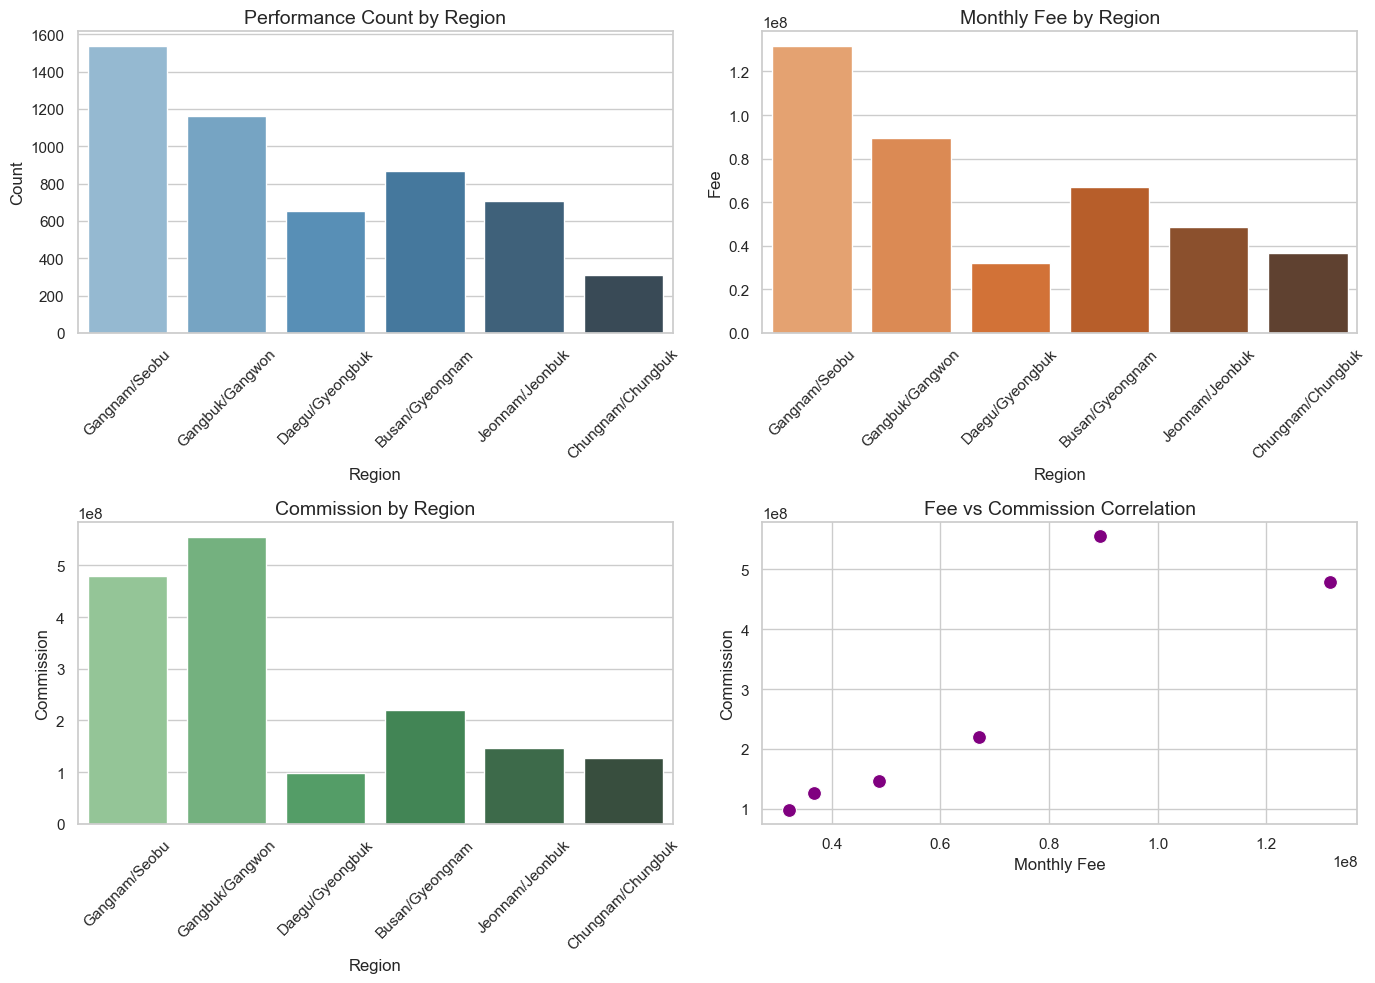

              Region Translated Region
0      Gangnam/Seobu           강남/서부본부
1    Gangbuk/Gangwon           강북/강원본부
2    Daegu/Gyeongbuk           대구/경북본부
3    Busan/Gyeongnam           부산/경남본부
4    Jeonnam/Jeonbuk           전남/전북본부
5  Chungnam/Chungbuk           충남/충북본부


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 영문 데이터 입력
data = {
    'Region': ['Gangnam/Seobu', 'Gangbuk/Gangwon', 'Daegu/Gyeongbuk', 'Busan/Gyeongnam', 'Jeonnam/Jeonbuk', 'Chungnam/Chungbuk'],
    'Count': [1539, 1160, 654, 866, 707, 311],
    'Fee': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    'Commission': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}
df = pd.DataFrame(data)

# 번역 딕셔너리
translation = {
    'Gangnam/Seobu': '강남/서부본부',
    'Gangbuk/Gangwon': '강북/강원본부',
    'Daegu/Gyeongbuk': '대구/경북본부',
    'Busan/Gyeongnam': '부산/경남본부',
    'Jeonnam/Jeonbuk': '전남/전북본부',
    'Chungnam/Chungbuk': '충남/충북본부',
}

# 시각화 설정
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(14, 10))

# 1. 실적 건수 비교
plt.subplot(2, 2, 1)
sns.barplot(x="Region", y="Count", data=df, palette="Blues_d")
plt.title("Performance Count by Region", fontsize=14)
plt.xticks(rotation=45)

# 2. 실적 월정료 비교
plt.subplot(2, 2, 2)
sns.barplot(x="Region", y="Fee", data=df, palette="Oranges_d")
plt.title("Monthly Fee by Region", fontsize=14)
plt.xticks(rotation=45)

# 3. 실적 지급수수료 비교
plt.subplot(2, 2, 3)
sns.barplot(x="Region", y="Commission", data=df, palette="Greens_d")
plt.title("Commission by Region", fontsize=14)
plt.xticks(rotation=45)

# 4. 월정료와 지급수수료 상관관계
plt.subplot(2, 2, 4)
sns.scatterplot(x="Fee", y="Commission", data=df, s=100, color="purple")
plt.title("Fee vs Commission Correlation", fontsize=14)
plt.xlabel("Monthly Fee")
plt.ylabel("Commission")

# 그래프 레이아웃 최적화
plt.tight_layout()
plt.show()

# 번역된 레이블을 추가로 적용
translated_labels = [translation.get(region, region) for region in df['Region']]

# 번역 레이블을 파일에 반영
df['Translated Region'] = translated_labels
print(df[['Region', 'Translated Region']])

In [75]:
pip install googletrans==4.0.0-rc1

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/55.1 kB ? eta -:--:--
   ---------------------------------------- 55.1/55.1 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   ---------------------------------------- 133.4/133.4 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.6 kB ? eta -:--:--
   ---------------------------------------- 42.6/42.6 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/58.8 kB ? eta -:--:--
   ---------------------------------------- 58.8/58.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/65.0 kB ? eta -:--:--
   ---------------------------------------- 65.0/65.0 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [77]:
import matplotlib
   matplotlib.rc('font', family='Malgun Gothic')
   matplotlib.rcParams['axes.unicode_minus'] = False

IndentationError: unexpected indent (1708882758.py, line 2)

In [81]:
import matplotlib.pyplot as plt
   import matplotlib.font_manager as fm
   import os

IndentationError: unexpected indent (1867839622.py, line 2)

In [83]:
# 폰트 경로 설정 (사용자 폰트 지정 가능)
   font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에 기본 설치된 '맑은 고딕' 폰트 경로
   font_prop = fm.FontProperties(fname=font_path)  # FontProperties로 폰트 불러오기

   # 한글 폰트 적용
   plt.rcParams['font.family'] = font_prop.get_name()
   plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

IndentationError: unexpected indent (3824354790.py, line 2)

C:\Users\User\AppData\Local\Temp\ipykernel_16932\156009016.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='지사', y='KTT월정료', data=branch_df, palette='Set2', edgecolor='black', ax=ax1)


PDF 보고서가 'D:/시각화_보고서.pdf'에 저장되었습니다.


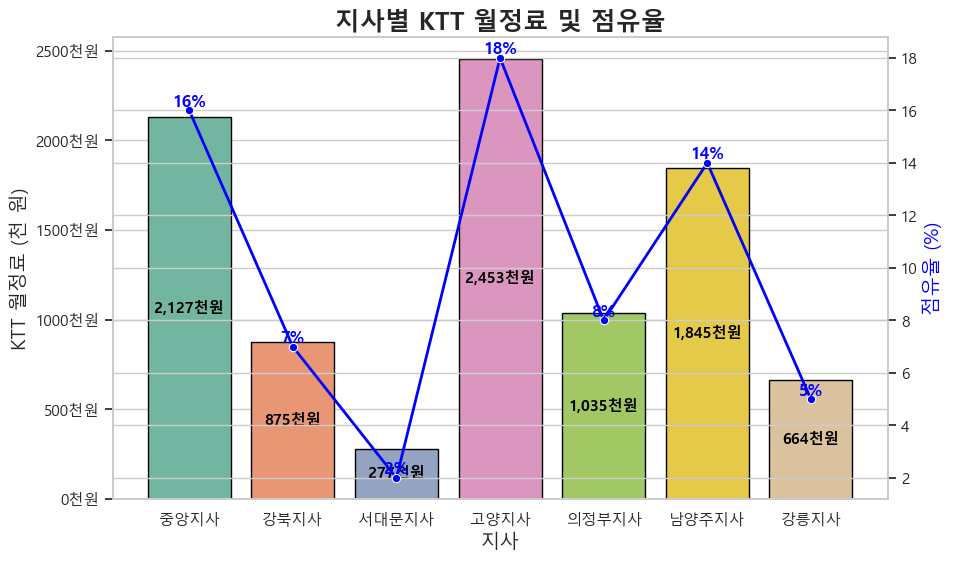

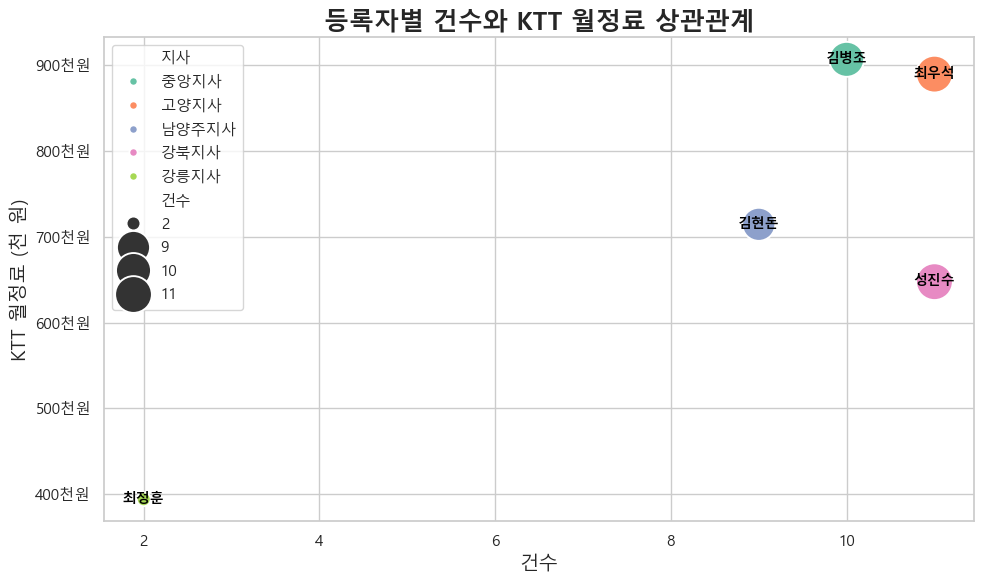

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter
from matplotlib.backends.backend_pdf import PdfPages
import os
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows에서 사용할 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에 기본 설치된 '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)  # FontProperties로 폰트 불러오기
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터프레임 생성 (31명 등록자 적용)
data_branch = {
    '지사': ['중앙지사', '강북지사', '서대문지사', '고양지사', '의정부지사', '남양주지사', '강릉지사'],
    '건수': [28, 16, 5, 38, 17, 28, 5],
    'KTT월정료': [2127900, 875670, 277750, 2453796, 1035395, 1845804, 664000],
    '점유율': [16, 7, 2, 18, 8, 14, 5]
}

data_registrar = {
    '지사': ['중앙지사', '고양지사', '남양주지사', '강북지사', '강릉지사'],
    '등록자': ['김병조', '최우석', '김현돈', '성진수', '최정훈'],
    '건수': [10, 11, 9, 11, 2],
    'KTT월정료': [907000, 889755, 714607, 647705, 394000]
}

# DataFrame 생성
branch_df = pd.DataFrame(data_branch)
registrar_summary = pd.DataFrame(data_registrar)

# 숫자를 천 원 단위로 포맷하는 함수
def thousand_unit_formatter(x, pos):
    return '{:.0f}천원'.format(x / 1000)

# 시각화 1: 지사별 KTT 월정료와 점유율
fig1, ax1 = plt.subplots(figsize=(10, 6))

barplot = sns.barplot(x='지사', y='KTT월정료', data=branch_df, palette='Set2', edgecolor='black', ax=ax1)
ax1.set_title('지사별 KTT 월정료 및 점유율', fontsize=18, weight='bold')
ax1.set_xlabel('지사', fontsize=14)
ax1.set_ylabel('KTT 월정료 (천 원)', fontsize=14)
ax1.yaxis.set_major_formatter(FuncFormatter(thousand_unit_formatter))

# 각 막대에 금액 표시
for p in ax1.patches:
    width = p.get_height()
    y_position = width * 0.5
    ax1.annotate(f'{int(width / 1000):,}천원',
                 (p.get_x() + p.get_width() / 2., y_position),
                 ha='center', va='center', fontsize=11, weight='bold', color='black')

# 점유율 라인 그래프 생성
ax2 = ax1.twinx()
sns.lineplot(x='지사', y='점유율', data=branch_df, marker='o', color='blue', ax=ax2, linewidth=2)
ax2.set_ylabel('점유율 (%)', fontsize=14, color='blue')

for line in ax2.lines:
    for i, point in enumerate(line.get_xydata()):
        ax2.annotate(f'{point[1]:.0f}%', (point[0], point[1]), ha='center', va='bottom', fontsize=12, weight='bold', color='blue')

# 시각화 2: 등록자별 건수와 KTT 월정료
fig2, ax3 = plt.subplots(figsize=(10, 6))

scatter = sns.scatterplot(x='건수', y='KTT월정료', hue='지사', size='건수', data=registrar_summary,
                          palette='Set2', sizes=(100, 700), ax=ax3)

for i in range(registrar_summary.shape[0]):
    plt.text(x=registrar_summary['건수'][i], y=registrar_summary['KTT월정료'][i],
             s=registrar_summary['등록자'][i],
             ha='center', va='center', fontsize=10, weight='bold', color='black')

ax3.set_title('등록자별 건수와 KTT 월정료 상관관계', fontsize=18, weight='bold')
ax3.set_xlabel('건수', fontsize=14)
ax3.set_ylabel('KTT 월정료 (천 원)', fontsize=14)
ax3.yaxis.set_major_formatter(FuncFormatter(thousand_unit_formatter))

plt.tight_layout()

# PDF로 저장
pdf_path = 'D:/시각화_보고서.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig1)
    pdf.savefig(fig2)

# PDF 파일 열기
os.system(f'start {pdf_path}')

print(f"PDF 보고서가 '{pdf_path}'에 저장되었습니다.")

C:\Users\User\AppData\Local\Temp\ipykernel_16932\33600595.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\33600595.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\33600595.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_지급수수료", data=df, ax=axes[1, 0], palette="Greens_d")
C:\Users\User\AppData

PDF 보고서가 'D:/사외채널_시각화.pdf'에 저장되었습니다.


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from curren

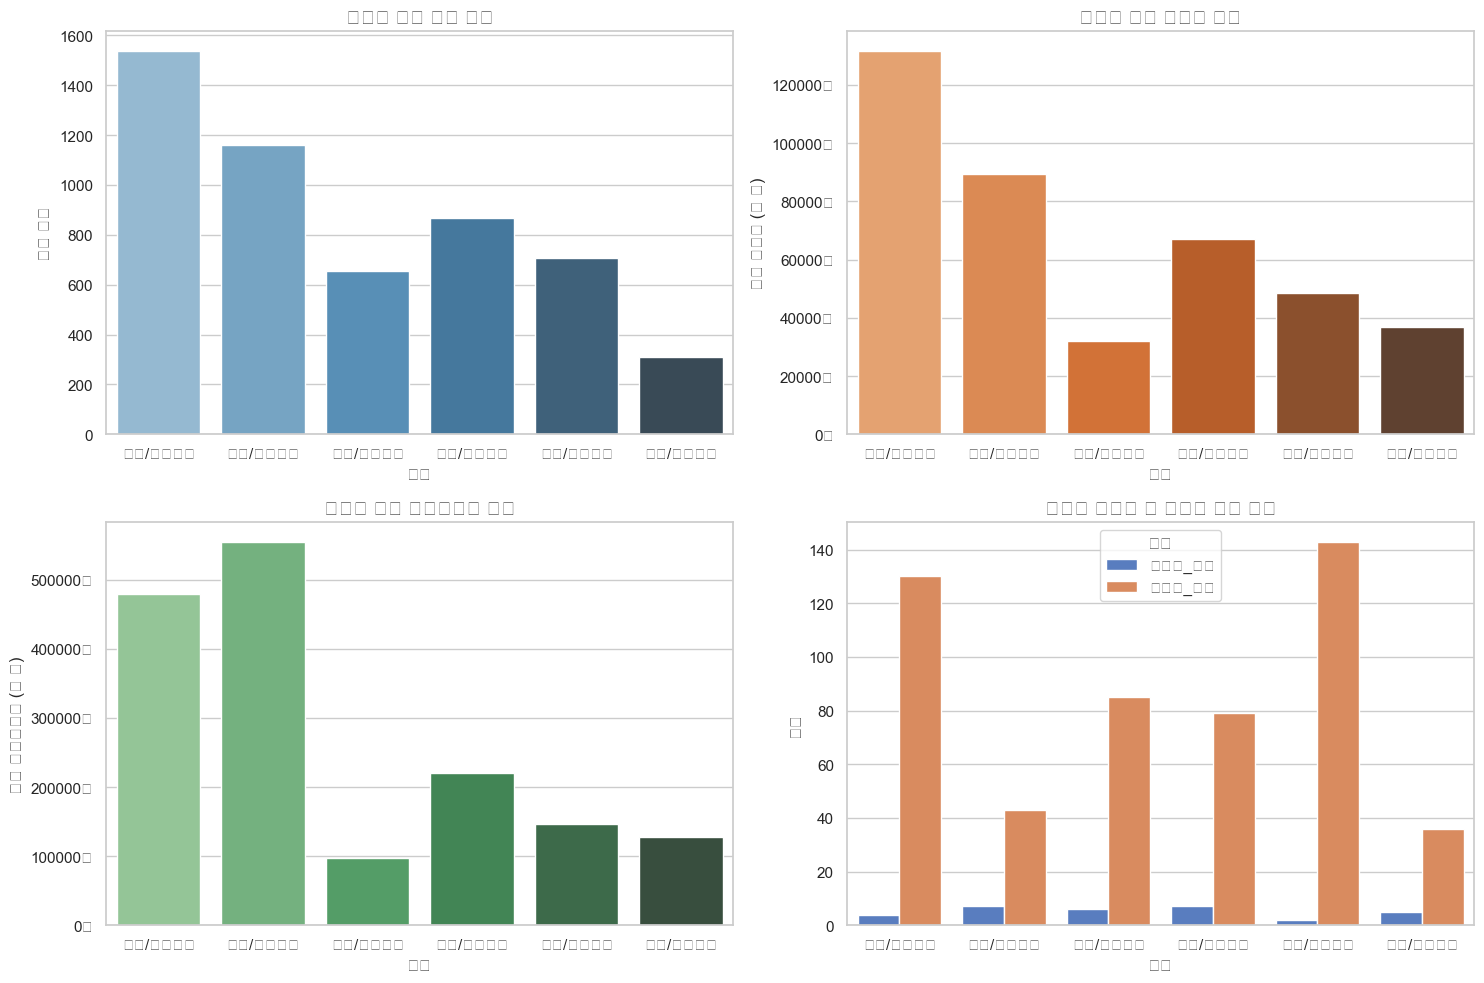

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FuncFormatter
from matplotlib.backends.backend_pdf import PdfPages
import os
import matplotlib.font_manager as fm

# 한글 폰트 설정 (Windows에서 사용할 경우)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에 기본 설치된 '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)  # FontProperties로 폰트 불러오기
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# ======== 데이터 입력 ========
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '전체_건수': [134, 50, 91, 86, 145, 41],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# ======== 숫자 단위 포맷 함수 ========
def thousand_formatter(x, pos):
    return '{:.0f}천'.format(x / 1000)

# ======== 시각화 ========
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 전체 건수 비교
sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("본부별 실적 건수 비교", fontsize=14)
axes[0, 0].set_ylabel("실적 건수", fontsize=12)

# 2. 실적 월정료 비교
sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
axes[0, 1].set_title("본부별 실적 월정료 비교", fontsize=14)
axes[0, 1].set_ylabel("실적 월정료 (천 원)", fontsize=12)
axes[0, 1].yaxis.set_major_formatter(FuncFormatter(thousand_formatter))

# 3. 실적 지급수수료 비교
sns.barplot(x="구분", y="실적_지급수수료", data=df, ax=axes[1, 0], palette="Greens_d")
axes[1, 0].set_title("본부별 실적 지급수수료 비교", fontsize=14)
axes[1, 0].set_ylabel("실적 지급수수료 (천 원)", fontsize=12)
axes[1, 0].yaxis.set_major_formatter(FuncFormatter(thousand_formatter))

# 4. 대리점과 파트너 건수 비교
df_melted = pd.melt(df, id_vars='구분', value_vars=['대리점_건수', '파트너_건수'], var_name='채널', value_name='건수')
sns.barplot(x="구분", y="건수", hue="채널", data=df_melted, ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("본부별 대리점 및 파트너 건수 비교", fontsize=14)
axes[1, 1].set_ylabel("건수", fontsize=12)

# ======== 레이아웃 및 저장 ========
plt.tight_layout()

# PDF로 저장
pdf_path = 'D:/사외채널_시각화.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)

# PDF 파일 열기
os.system(f'start {pdf_path}')

print(f"PDF 보고서가 '{pdf_path}'에 저장되었습니다.")

In [95]:
import matplotlib.font_manager as fm
     fonts = [f.name for f in fm.fontManager.ttflist]
     print(fonts)  # 설치된 폰트 리스트 확인

IndentationError: unexpected indent (1124618966.py, line 2)

C:\Users\User\AppData\Local\Temp\ipykernel_16932\2853509790.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\2853509790.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\2853509790.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_지급수수료", data=df, ax=axes[1, 0], palette="Greens_d")
C:\Users\User\A

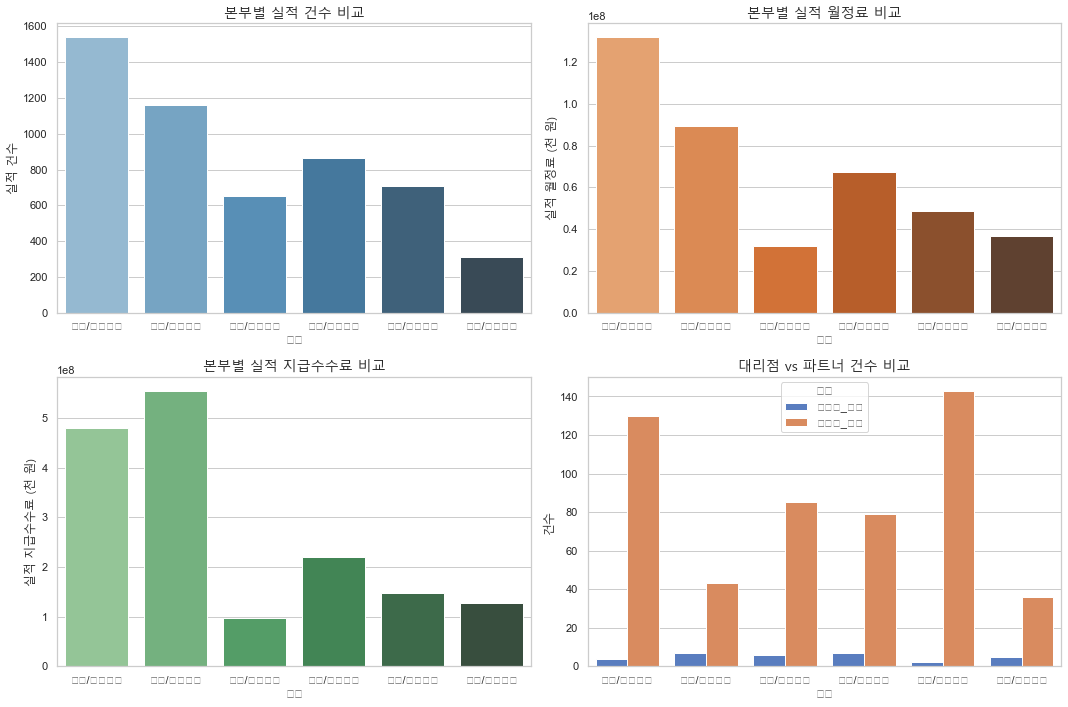

PDF 파일이 저장되었습니다: D:/사외채널_시각화.pdf


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
from matplotlib.backends.backend_pdf import PdfPages

# ======= 한글 폰트 설정 =======
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows 기본 폰트 경로 (맑은 고딕)
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# ======= 데이터 입력 =======
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '전체_건수': [134, 50, 91, 86, 145, 41],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# ======= 시각화 설정 =======
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 본부별 실적 건수
sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("본부별 실적 건수 비교", fontproperties=font_prop, fontsize=14)
axes[0, 0].set_ylabel("실적 건수", fontproperties=font_prop, fontsize=12)

# 2. 본부별 실적 월정료
sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
axes[0, 1].set_title("본부별 실적 월정료 비교", fontproperties=font_prop, fontsize=14)
axes[0, 1].set_ylabel("실적 월정료 (천 원)", fontproperties=font_prop, fontsize=12)

# 3. 본부별 실적 지급수수료
sns.barplot(x="구분", y="실적_지급수수료", data=df, ax=axes[1, 0], palette="Greens_d")
axes[1, 0].set_title("본부별 실적 지급수수료 비교", fontproperties=font_prop, fontsize=14)
axes[1, 0].set_ylabel("실적 지급수수료 (천 원)", fontproperties=font_prop, fontsize=12)

# 4. 대리점 vs 파트너 건수 비교
df_melted = pd.melt(df, id_vars='구분', value_vars=['대리점_건수', '파트너_건수'],
                    var_name='채널', value_name='건수')
sns.barplot(x="구분", y="건수", hue="채널", data=df_melted, ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("대리점 vs 파트너 건수 비교", fontproperties=font_prop, fontsize=14)
axes[1, 1].set_ylabel("건수", fontproperties=font_prop, fontsize=12)

# ======= PDF로 저장 =======
pdf_path = 'D:/사외채널_시각화.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)

# PDF 열기
import os
os.system(f'start {pdf_path}')

plt.tight_layout()
plt.show()
print(f"PDF 파일이 저장되었습니다: {pdf_path}")

C:\Users\User\AppData\Local\Temp\ipykernel_16932\2067552644.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\2067552644.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\2067552644.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_지급수수료", data=df, ax=axes[1, 0], palette="Greens_d")
C:\Users\User\A

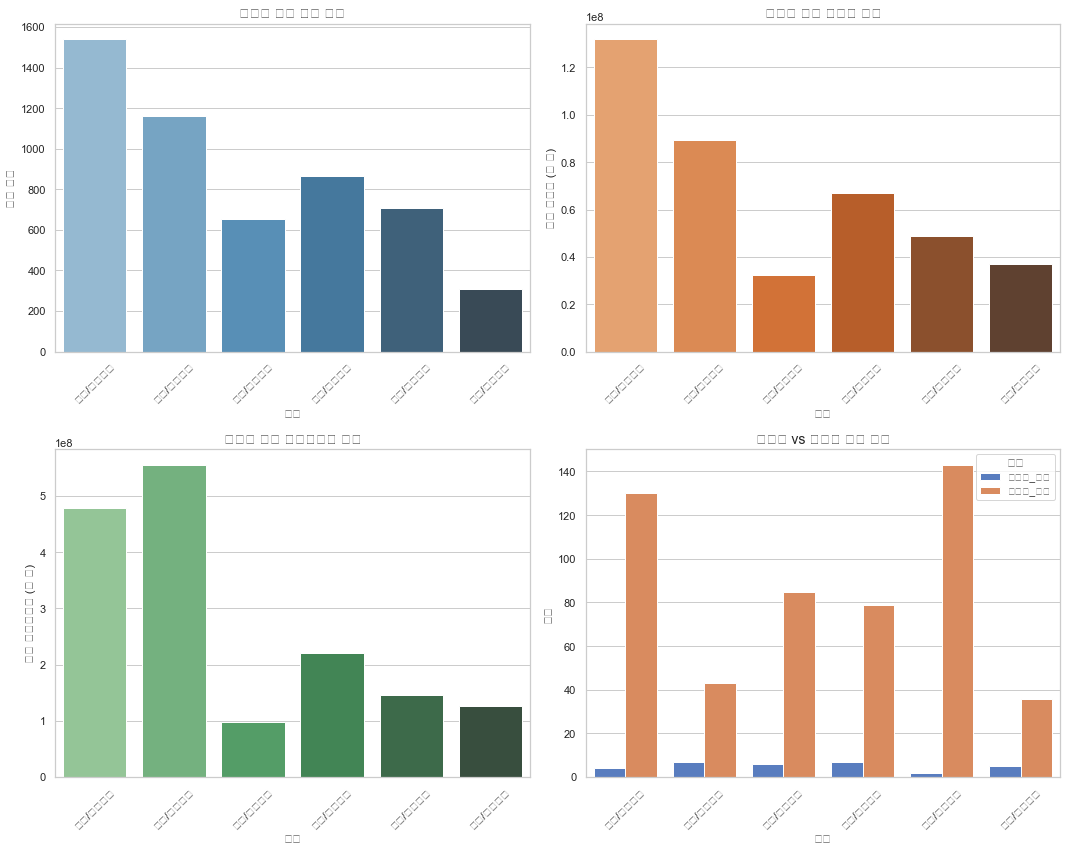

PDF 파일이 저장되었습니다: D:/사외채널_시각화.pdf


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib.backends.backend_pdf import PdfPages

# ======= 한글 폰트 설정 =======
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows 기본 폰트 경로 (맑은 고딕)
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# ======= 데이터 입력 =======
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '전체_건수': [134, 50, 91, 86, 145, 41],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# ======= 시각화 설정 =======
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. 본부별 실적 건수
sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("본부별 실적 건수 비교", fontsize=14)
axes[0, 0].set_ylabel("실적 건수", fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)  # x축 레이블 회전

# 2. 본부별 실적 월정료
sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
axes[0, 1].set_title("본부별 실적 월정료 비교", fontsize=14)
axes[0, 1].set_ylabel("실적 월정료 (천 원)", fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. 본부별 실적 지급수수료
sns.barplot(x="구분", y="실적_지급수수료", data=df, ax=axes[1, 0], palette="Greens_d")
axes[1, 0].set_title("본부별 실적 지급수수료 비교", fontsize=14)
axes[1, 0].set_ylabel("실적 지급수수료 (천 원)", fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. 대리점 vs 파트너 건수 비교
df_melted = pd.melt(df, id_vars='구분', value_vars=['대리점_건수', '파트너_건수'],
                    var_name='채널', value_name='건수')
sns.barplot(x="구분", y="건수", hue="채널", data=df_melted, ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("대리점 vs 파트너 건수 비교", fontsize=14)
axes[1, 1].set_ylabel("건수", fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title="채널", fontsize=10, title_fontsize=12, loc="upper right")

# ======= PDF로 저장 =======
pdf_path = 'D:/사외채널_시각화.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)

# PDF 열기
import os
os.system(f'start {pdf_path}')

plt.tight_layout()  # 여백 자동 조정
plt.show()
print(f"PDF 파일이 저장되었습니다: {pdf_path}")

C:\Users\User\AppData\Local\Temp\ipykernel_16932\601986744.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\601986744.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\601986744.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_지급수수료", data=df, ax=axes[1, 0], palette="Greens_d")
C:\Users\User\AppD

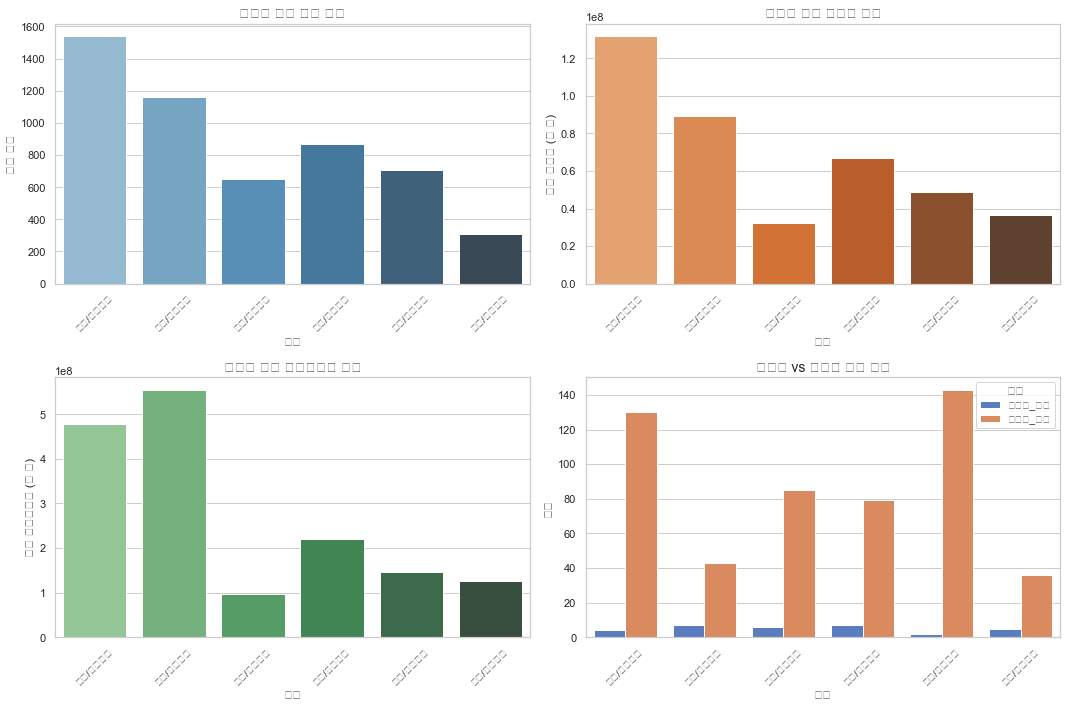

PDF 파일이 저장되었습니다: D:/사외채널_시각화_최종.pdf


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib.backends.backend_pdf import PdfPages

# ======= 한글 폰트 설정 =======
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# ======= 데이터 입력 =======
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '전체_건수': [134, 50, 91, 86, 145, 41],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# ======= 시각화 설정 =======
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 본부별 실적 건수
sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("본부별 실적 건수 비교", fontsize=14)
axes[0, 0].set_ylabel("실적 건수", fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45, labelsize=10)

# 2. 본부별 실적 월정료
sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
axes[0, 1].set_title("본부별 실적 월정료 비교", fontsize=14)
axes[0, 1].set_ylabel("실적 월정료 (천 원)", fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=10)

# 3. 본부별 실적 지급수수료
sns.barplot(x="구분", y="실적_지급수수료", data=df, ax=axes[1, 0], palette="Greens_d")
axes[1, 0].set_title("본부별 실적 지급수수료 비교", fontsize=14)
axes[1, 0].set_ylabel("실적 지급수수료 (천 원)", fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=10)

# 4. 대리점 vs 파트너 건수 비교
df_melted = pd.melt(df, id_vars='구분', value_vars=['대리점_건수', '파트너_건수'],
                    var_name='채널', value_name='건수')
sns.barplot(x="구분", y="건수", hue="채널", data=df_melted, ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("대리점 vs 파트너 건수 비교", fontsize=14)
axes[1, 1].set_ylabel("건수", fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1, 1].legend(title="채널", fontsize=10, title_fontsize=12, loc="upper right")

# ======= PDF로 저장 =======
pdf_path = 'D:/사외채널_시각화_최종.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)

# PDF 열기
import os
os.system(f'start {pdf_path}')

plt.tight_layout()  # 여백 자동 조정
plt.show()
print(f"PDF 파일이 저장되었습니다: {pdf_path}")

데이터 요약:
         대리점_건수      파트너_건수       전체_건수        실적_건수        실적_월정료  \
count  6.000000    6.000000    6.000000     6.000000  6.000000e+00   
mean   5.166667   86.000000   91.166667   872.833333  6.766699e+07   
std    1.940790   43.781275   42.357605   428.330441  3.784692e+07   
min    2.000000   36.000000   41.000000   311.000000  3.217282e+07   
25%    4.250000   52.000000   59.000000   667.250000  3.976345e+07   
50%    5.500000   82.000000   88.500000   786.500000  5.791660e+07   
75%    6.750000  118.750000  123.250000  1086.500000  8.381990e+07   
max    7.000000  143.000000  145.000000  1539.000000  1.318292e+08   

           실적_지급수수료     평균_건수        평균_월정료      평균_지급수수료  
count  6.000000e+00   6.00000  6.000000e+00  6.000000e+00  
mean   2.711137e+08  11.00000  8.553808e+05  3.072016e+06  
std    1.963435e+08   6.60303  5.316870e+05  2.236059e+06  
min    9.776268e+07   5.00000  3.356390e+05  1.012705e+06  
25%    1.320571e+08   6.25000  4.612772e+05  1.446746e+06  
5

C:\Users\User\AppData\Local\Temp\ipykernel_16932\3672787302.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3672787302.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3672787302.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3672787302.

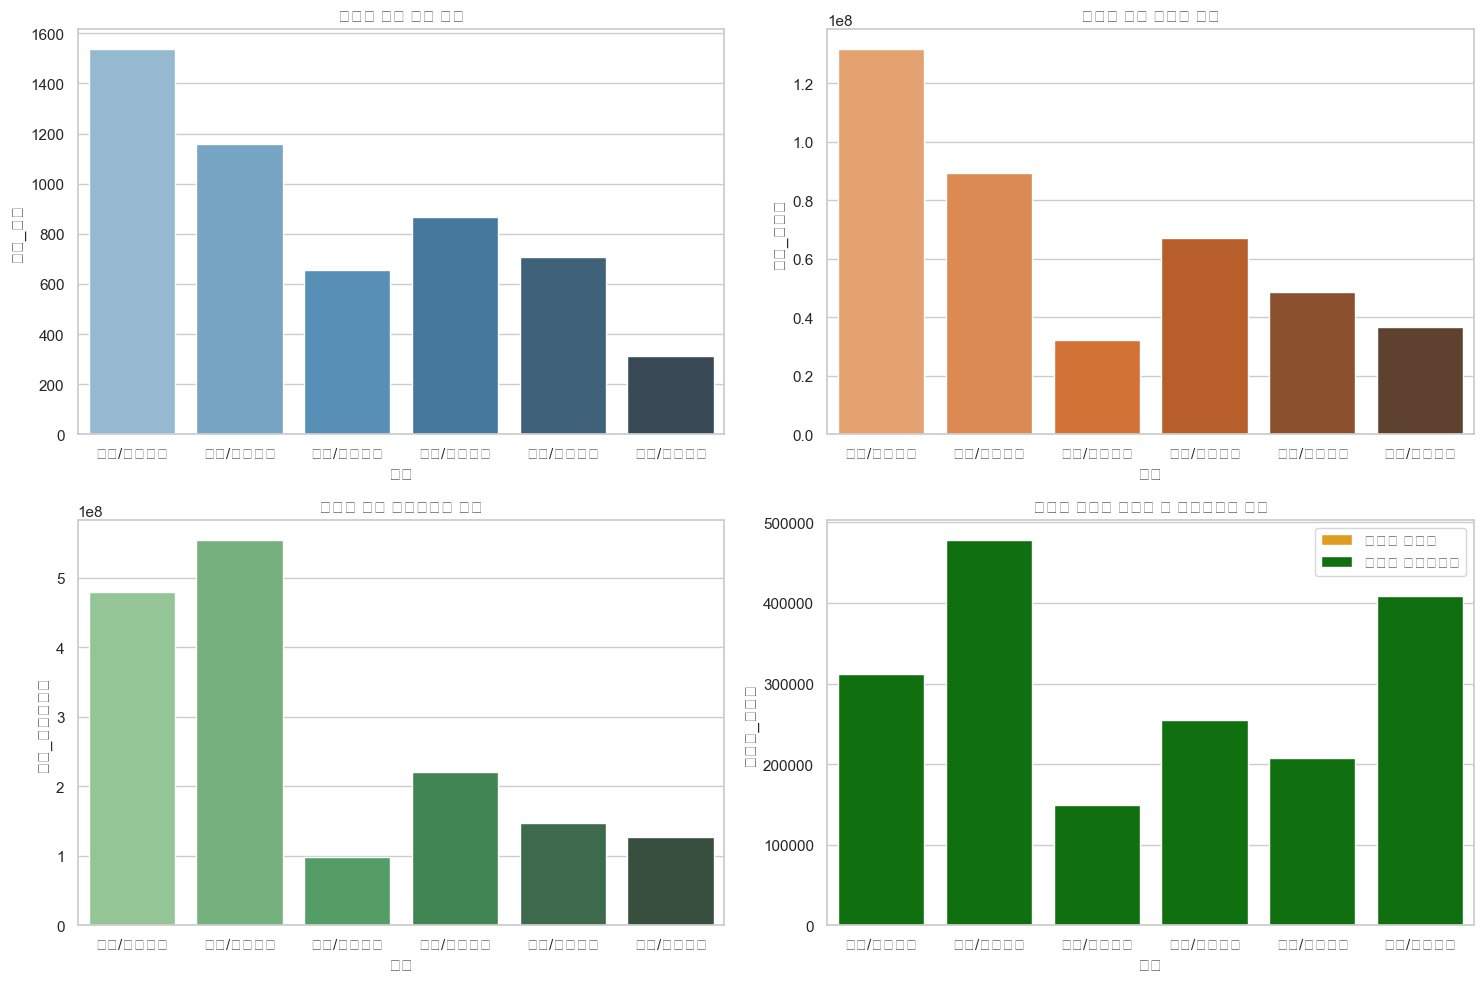


본부별 효율성 순위:
        구분        건수당_월정료      건수당_지급수수료
5  충남/충북본부  118292.700965  408774.173633
0  강남/서부본부   85658.977908  311337.315789
3  부산/경남본부   77536.374134  254746.769053
1  강북/강원본부   77049.741379  478611.982759
4  전남/전북본부   68863.797737  207697.666195
2  대구/경북본부   49193.911315  149484.224771

본부: 강남/서부본부
실적 건수: 1539 | 평균 월정료: 983,800 | 평균 지급수수료: 3,575,732
부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.
잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.

본부: 강북/강원본부
실적 건수: 1160 | 평균 월정료: 1,787,554 | 평균 지급수수료: 7,103,798
부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.
잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.

본부: 대구/경북본부
실적 건수: 654 | 평균 월정료: 353,542 | 평균 지급수수료: 1,073,915
부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.
잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.

본부: 부산/경남본부
실적 건수: 866 | 평균 월정료: 784,483 | 평균 지급수수료: 2,565,241
부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.
잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.

본부: 전남/전북본부
실적 건수: 707 | 평균 월정료: 335,639 | 평균 지급수수료: 1,012,705
부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.
잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.

본부: 충남/충북본부
실적 건수: 311 | 평균 월정료: 887,267 | 평균 지급수수료: 3,

In [107]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 입력
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '전체_건수': [134, 50, 91, 86, 145, 41],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
    '평균_건수': [11, 23, 5, 10, 5, 12],
    '평균_월정료': [983800, 1787554, 353542, 784483, 335639, 887267],
    '평균_지급수수료': [3575732, 7103798, 1073915, 2565241, 1012705, 3100702],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 한글 폰트 설정 (Windows)
plt.rc('font', family='Malgun Gothic')  # 맑은 고딕 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 요약 및 결측치 확인
print("데이터 요약:")
print(df.describe())
print("\n결측치 확인:")
print(df.isnull().sum())

# 효율성 계산
df['건수당_월정료'] = df['실적_월정료'] / df['실적_건수']
df['건수당_지급수수료'] = df['실적_지급수수료'] / df['실적_건수']

# 시각화 설정
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# 1. 본부별 전체 건수 비교
plt.subplot(2, 2, 1)
sns.barplot(x="구분", y="실적_건수", data=df, palette="Blues_d")
plt.title("본부별 실적 건수 비교")

# 2. 본부별 실적 월정료 비교
plt.subplot(2, 2, 2)
sns.barplot(x="구분", y="실적_월정료", data=df, palette="Oranges_d")
plt.title("본부별 실적 월정료 비교")

# 3. 본부별 실적 지급수수료 비교
plt.subplot(2, 2, 3)
sns.barplot(x="구분", y="실적_지급수수료", data=df, palette="Greens_d")
plt.title("본부별 실적 지급수수료 비교")

# 4. 건수당 월정료 및 지급수수료 비교
plt.subplot(2, 2, 4)
sns.barplot(x="구분", y="건수당_월정료", data=df, color="orange", label="건수당 월정료")
sns.barplot(x="구분", y="건수당_지급수수료", data=df, color="green", label="건수당 지급수수료")
plt.title("본부별 건수당 월정료 및 지급수수료 비교")
plt.legend()

plt.tight_layout()
plt.show()

# 효율성 순위
efficiency_rank = df[['구분', '건수당_월정료', '건수당_지급수수료']].sort_values(by='건수당_월정료', ascending=False)
print("\n본부별 효율성 순위:")
print(efficiency_rank)

# 잘하는 점, 부족한 점 및 개선안 도출
for idx, row in df.iterrows():
    print(f"\n본부: {row['구분']}")
    print(f"실적 건수: {row['실적_건수']} | 평균 월정료: {row['평균_월정료']:,} | 평균 지급수수료: {row['평균_지급수수료']:,}")
    if row['건수당_월정료'] > 1000000:
        print("잘하는 점: 높은 건수당 월정료를 기록하고 있습니다.")
    else:
        print("부족한 점: 건수당 월정료가 낮아 수익성이 떨어집니다.")
    if row['건수당_지급수수료'] > 5000000:
        print("부족한 점: 지급수수료 부담이 큽니다. 비용 효율화가 필요합니다.")
    else:
        print("잘하는 점: 지급수수료 대비 효율적으로 운영되고 있습니다.")

C:\Users\User\AppData\Local\Temp\ipykernel_16932\601986744.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\601986744.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\601986744.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_지급수수료", data=df, ax=axes[1, 0], palette="Greens_d")
C:\Users\User\AppD

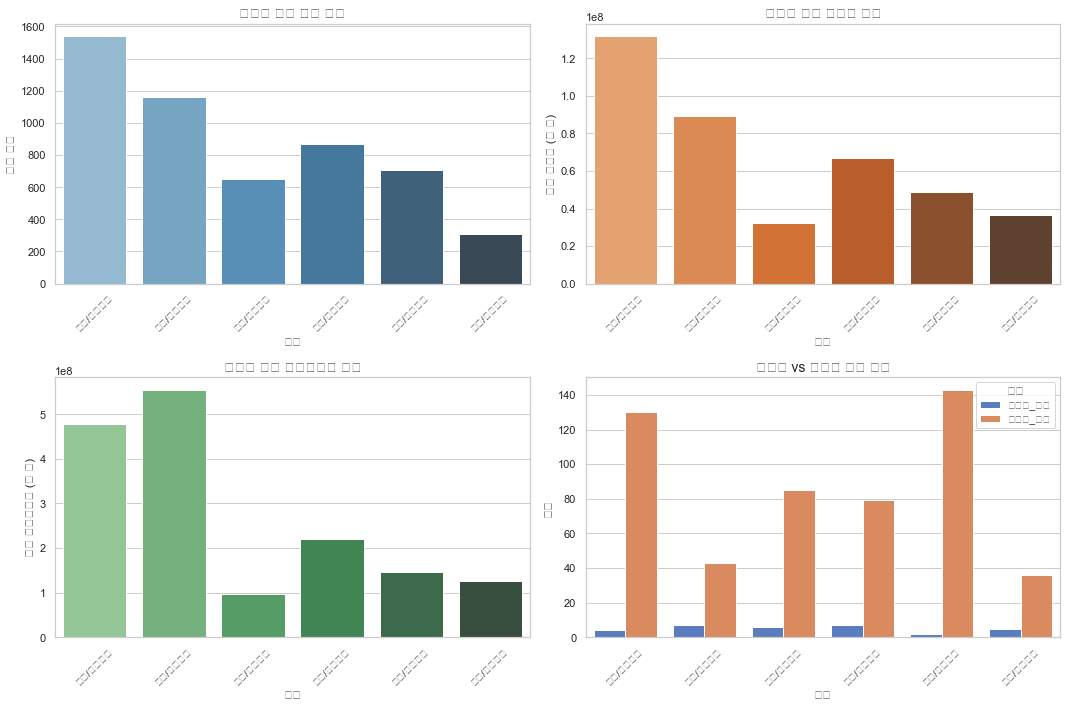

PDF 파일이 저장되었습니다: D:/사외채널_시각화_최종.pdf


In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib.backends.backend_pdf import PdfPages

# ======= 한글 폰트 설정 =======
font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# ======= 데이터 입력 =======
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '전체_건수': [134, 50, 91, 86, 145, 41],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# ======= 시각화 설정 =======
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 본부별 실적 건수
sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("본부별 실적 건수 비교", fontsize=14)
axes[0, 0].set_ylabel("실적 건수", fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45, labelsize=10)

# 2. 본부별 실적 월정료
sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
axes[0, 1].set_title("본부별 실적 월정료 비교", fontsize=14)
axes[0, 1].set_ylabel("실적 월정료 (천 원)", fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=10)

# 3. 본부별 실적 지급수수료
sns.barplot(x="구분", y="실적_지급수수료", data=df, ax=axes[1, 0], palette="Greens_d")
axes[1, 0].set_title("본부별 실적 지급수수료 비교", fontsize=14)
axes[1, 0].set_ylabel("실적 지급수수료 (천 원)", fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=10)

# 4. 대리점 vs 파트너 건수 비교
df_melted = pd.melt(df, id_vars='구분', value_vars=['대리점_건수', '파트너_건수'],
                    var_name='채널', value_name='건수')
sns.barplot(x="구분", y="건수", hue="채널", data=df_melted, ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("대리점 vs 파트너 건수 비교", fontsize=14)
axes[1, 1].set_ylabel("건수", fontsize=12)
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1, 1].legend(title="채널", fontsize=10, title_fontsize=12, loc="upper right")

# ======= PDF로 저장 =======
pdf_path = 'D:/사외채널_시각화_최종.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)

# PDF 열기
import os
os.system(f'start {pdf_path}')

plt.tight_layout()  # 여백 자동 조정
plt.show()
print(f"PDF 파일이 저장되었습니다: {pdf_path}")

C:\Users\User\AppData\Local\Temp\ipykernel_16932\3277623725.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3277623725.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3277623725.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
C:\Users\User\AppData\Local\Temp\ipykernel_16932\3277623725.py:32: UserWarning: se

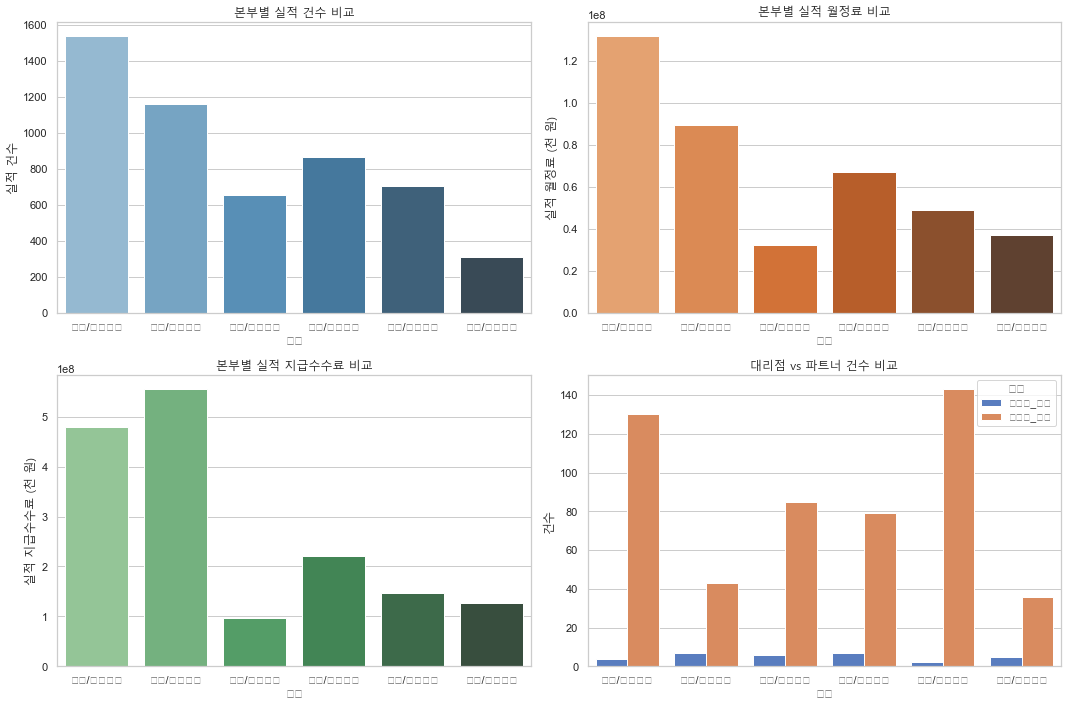

PDF 파일이 저장되었습니다: D:/사외채널_시각화_개선.pdf


In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib.backends.backend_pdf import PdfPages

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')

# ======= 데이터 입력 =======
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '전체_건수': [134, 50, 91, 86, 145, 41],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# ======= 시각화 설정 =======
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# x축 레이블 줄바꿈 처리 함수
def wrap_labels(ax, space=10):
    for label in ax.get_xticklabels():
        label.set_text('\n'.join(label.get_text()[i:i+space] for i in range(0, len(label.get_text()), space)))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")

# 1. 본부별 실적 건수
sns.barplot(x="구분", y="실적_건수", data=df, ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("본부별 실적 건수 비교", fontsize=14, fontproperties=font_prop)
axes[0, 0].set_ylabel("실적 건수", fontsize=12, fontproperties=font_prop)
wrap_labels(axes[0, 0])

# 2. 본부별 실적 월정료
sns.barplot(x="구분", y="실적_월정료", data=df, ax=axes[0, 1], palette="Oranges_d")
axes[0, 1].set_title("본부별 실적 월정료 비교", fontsize=14, fontproperties=font_prop)
axes[0, 1].set_ylabel("실적 월정료 (천 원)", fontsize=12, fontproperties=font_prop)
wrap_labels(axes[0, 1])

# 3. 본부별 실적 지급수수료
sns.barplot(x="구분", y="실적_지급수수료", data=df, ax=axes[1, 0], palette="Greens_d")
axes[1, 0].set_title("본부별 실적 지급수수료 비교", fontsize=14, fontproperties=font_prop)
axes[1, 0].set_ylabel("실적 지급수수료 (천 원)", fontsize=12, fontproperties=font_prop)
wrap_labels(axes[1, 0])

# 4. 대리점 vs 파트너 건수 비교
df_melted = pd.melt(df, id_vars='구분', value_vars=['대리점_건수', '파트너_건수'],
                    var_name='채널', value_name='건수')
sns.barplot(x="구분", y="건수", hue="채널", data=df_melted, ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("대리점 vs 파트너 건수 비교", fontsize=14, fontproperties=font_prop)
axes[1, 1].set_ylabel("건수", fontsize=12, fontproperties=font_prop)
wrap_labels(axes[1, 1])
axes[1, 1].legend(title="채널", fontsize=10, title_fontsize=12, loc="upper right")

# ======= PDF로 저장 =======
pdf_path = 'D:/사외채널_시각화_개선.pdf'
with PdfPages(pdf_path) as pdf:
    pdf.savefig(fig)

# PDF 열기
import os
os.system(f'start {pdf_path}')

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # 그래프 간 여백 조정
plt.tight_layout()
plt.show()
print(f"PDF 파일이 저장되었습니다: {pdf_path}")

In [115]:
pip install dash plotly pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
    --------------------------------------- 0.1/7.8 MB 6.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/7.8 MB 9.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/7.8 MB 13.3 MB/s eta 0:00:01
   ----------- ---------------------------- 2.3/7.8 MB 16.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.8/7.8 MB 14.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.5/7.8 MB 16.0 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 16.6 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 17.7 MB/s eta 0:00:01
   ---------------------------------- ----- 6.7/7.8 MB 18.5 MB/s eta 0:00:01
   ---------------------------------------  7.8/7.8 MB 19.2 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 17.8 MB/s eta 0:00:00
Note: yo

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [117]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html

# ===== 데이터 준비 =====
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}
df = pd.DataFrame(data)

# ===== 앱 초기화 =====
app = Dash(__name__)

# ===== 그래프 생성 =====
fig1 = px.bar(df, x='구분', y='실적_건수', title='본부별 실적 건수 비교', text_auto=True, color='실적_건수')
fig2 = px.bar(df, x='구분', y='실적_월정료', title='본부별 실적 월정료 비교', text_auto=True, color='실적_월정료')
fig3 = px.bar(df, x='구분', y='실적_지급수수료', title='본부별 실적 지급수수료 비교', text_auto=True, color='실적_지급수수료')

# 대리점 vs 파트너 건수
melted_df = df.melt(id_vars='구분', value_vars=['대리점_건수', '파트너_건수'], var_name='채널', value_name='건수')
fig4 = px.bar(melted_df, x='구분', y='건수', color='채널', title='대리점 vs 파트너 건수 비교', barmode='group', text_auto=True)

# ===== HTML 레이아웃 =====
app.layout = html.Div([
    html.H1("사외채널 실적 시각화 대시보드", style={'textAlign': 'center', 'fontFamily': 'Malgun Gothic'}),
    dcc.Graph(figure=fig1),
    dcc.Graph(figure=fig2),
    dcc.Graph(figure=fig3),
    dcc.Graph(figure=fig4),
])

# ===== 서버 실행 =====
if __name__ == '__main__':
    app.run_server(debug=True)


In [11]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc

# ===== 데이터 입력 =====
data = {
    '구분': ['강남/서부본부', '강북/강원본부', '대구/경북본부', '부산/경남본부', '전남/전북본부', '충남/충북본부'],
    '대리점_건수': [4, 7, 6, 7, 2, 5],
    '파트너_건수': [130, 43, 85, 79, 143, 36],
    '실적_건수': [1539, 1160, 654, 866, 707, 311],
    '실적_월정료': [131829167, 89377700, 32172818, 67146500, 48686705, 36789030],
    '실적_지급수수료': [479148129, 555189900, 97762683, 220610702, 146842250, 127128768],
}
df = pd.DataFrame(data)

# 대리점과 파트너 건수를 합친 컬럼 추가
df['전체_건수'] = df['대리점_건수'] + df['파트너_건수']

# ===== 앱 초기화 =====
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# ===== 그래프 생성 =====
fig1 = px.bar(df, x='구분', y='실적_건수', title='본부별 실적 건수 비교', color='실적_건수', text_auto=True)
fig2 = px.pie(df, names='구분', values='실적_월정료', title='본부별 월정료 비율')
fig3 = px.scatter(df, x='실적_건수', y='실적_지급수수료', text='구분', title='실적 건수와 지급수수료 상관관계')
fig4 = px.line(df, x='구분', y='실적_월정료', title='본부별 실적 월정료 추이')

# ===== KPI 카드 생성 =====
def generate_kpi_card(title, value, color="primary"):
    return dbc.Card(
        dbc.CardBody([
            html.H5(title, className="card-title"),
            html.P(f"{value:,}", className="card-text"),
        ]),
        color=color, inverse=True
    )

# KPI 값 계산
total_cases = df['실적_건수'].sum()
avg_fee = int(df['실적_월정료'].mean())
total_commission = df['실적_지급수수료'].sum()

# ===== HTML 레이아웃 =====
app.layout = dbc.Container([
    html.H1("사외채널 실적 시각화 대시보드", style={'textAlign': 'center', 'marginBottom': '30px'}),

    # KPI 카드 섹션
    dbc.Row([
        dbc.Col(generate_kpi_card("총 실적 건수", total_cases, "success"), width=4),
        dbc.Col(generate_kpi_card("평균 월정료", avg_fee, "info"), width=4),
        dbc.Col(generate_kpi_card("총 지급수수료", total_commission, "danger"), width=4),
    ], className="mb-4"),

    # 그래프 섹션
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig1), width=6),
        dbc.Col(dcc.Graph(figure=fig2), width=6),
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(figure=fig3), width=6),
        dbc.Col(dcc.Graph(figure=fig4), width=6),
    ]),
])

# ===== 서버 실행 =====
if __name__ == '__main__':
    app.run_server(debug=True)

In [9]:
python dashboard_advanced.py

SyntaxError: invalid syntax (1452314599.py, line 1)

python: can't open file 'C:\\Users\\User\\Desktop\\jupytertest\\dashboard_advanced.py': [Errno 2] No such file or directory


In [1]:
!pip install dash-bootstrap-components

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/222.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/222.5 kB ? eta -:--:--
   -------------------- ------------------- 112.6/222.5 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 222.5/222.5 kB 2.3 MB/s eta 0:00:00


In [35]:
import os
print(os.getcwd())  # 현재 디렉토리 출력

C:\Users\User\Desktop\jupytertest


In [23]:
import os
print(os.listdir())  # 현재 디렉토리 내 파일 목록 출력

['.ipynb_checkpoints', '0509_유지시설 cs파일로 파이썬코드로 변환.ipynb', '21년실적_해지분석.ipynb', 'IP_10.13.1.155', 'KT AI 영업기회 시각화.ipynb', 'login_coordinates.json', 'login_script.au3', 'PDF파일저장_엑셀열려있는상태.ipynb', 'recorded_data_1733190399.json', 'recorded_data_1733269295.json', 'recorded_data_1733813318.json', 'recorded_data_1733815428.json', 'recorded_data_1733892442.json', 'recorded_data_1733892752.json', 'recorded_data_1734424913.json', 'recorded_data_1734425460.json', 'recorded_data_1734478751.json', 'recorded_data_1734479276.json', 'recorded_data_1734479661.json', 'recorded_data_1734479736.json', 'recorded_data_1734479863.json', 'recorded_data_1734481514.json', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'xls cs로변환(헤더포함).ipynb', '님스_총량제_RPA.ipynb', '님스가망고객등록.ipynb', '님스로그인.ipynb', '데이터시각화.ipynb', '면제병합 xls.ipynb', '법인신용정보 RPA2.ipynb', '법인신용정보로그인.ipynb', '병합 csv0903.ipynb', '사외채널 분석(7월~11월).ipynb', '사용_RPA_총량제2.ipynb', '신규p총량제병합0802.i

In [29]:
os.chdir('C:/Users/User/Desktop/jupytertest')  # 경로를 실제 파일 위치로 변경
print(os.getcwd())  # 이동 확인

C:\Users\User\Desktop\jupytertest


In [33]:
!python dashboard_advanced.py

python: can't open file 'C:\\Users\\User\\Desktop\\jupytertest\\dashboard_advanced.py': [Errno 2] No such file or directory


In [37]:
with open('dashboard_advanced.py', 'w') as f:
       f.write("# 여기에 파일 내용을 작성하세요.")

In [41]:
import os
os.chdir(r'C:\Users\User\Desktop\jupytertest')
print(os.getcwd())  # 경로 이동 확인

C:\Users\User\Desktop\jupytertest


In [59]:
!python dashboard_advanced.py

In [47]:
# -*- coding: utf-8 -*-

In [49]:
!python dashboard_advanced.py

SyntaxError: Non-UTF-8 code starting with '\xbf' in file C:\Users\User\Desktop\jupytertest\dashboard_advanced.py on line 1, but no encoding declared; see https://peps.python.org/pep-0263/ for details


In [51]:
with open("dashboard_advanced.py", "w", encoding="utf-8") as f:
       f.write("# 여기에 코드 내용을 작성하세요.")

In [55]:
import os
print(os.getcwd())  # 경로 확인
print(os.listdir())  # 파일 확인

C:\Users\User\Desktop\jupytertest
['.ipynb_checkpoints', '0509_유지시설 cs파일로 파이썬코드로 변환.ipynb', '21년실적_해지분석.ipynb', 'dashboard_advanced.py', 'IP_10.13.1.155', 'KT AI 영업기회 시각화.ipynb', 'login_coordinates.json', 'login_script.au3', 'PDF파일저장_엑셀열려있는상태.ipynb', 'recorded_data_1733190399.json', 'recorded_data_1733269295.json', 'recorded_data_1733813318.json', 'recorded_data_1733815428.json', 'recorded_data_1733892442.json', 'recorded_data_1733892752.json', 'recorded_data_1734424913.json', 'recorded_data_1734425460.json', 'recorded_data_1734478751.json', 'recorded_data_1734479276.json', 'recorded_data_1734479661.json', 'recorded_data_1734479736.json', 'recorded_data_1734479863.json', 'recorded_data_1734481514.json', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'xls cs로변환(헤더포함).ipynb', '님스_총량제_RPA.ipynb', '님스가망고객등록.ipynb', '님스로그인.ipynb', '데이터시각화.ipynb', '면제병합 xls.ipynb', '법인신용정보 RPA2.ipynb', '법인신용정보로그인.ipynb', '병합 csv0903.ipynb', '사

In [61]:
!python dashboard_advanced.py

In [1]:
# -*- coding: utf-8 -*-

In [3]:
!python dashboard_advanced.py

In [5]:
with open("dashboard_advanced.py", "w", encoding="utf-8") as f:
    f.write("# 여기에 코드를 작성하세요.")

In [7]:
import os
print(os.getcwd())  # 현재 디렉토리 확인
print(os.listdir())  # 현재 폴더에 있는 파일 확인

C:\Users\User\Desktop\jupytertest
['.ipynb_checkpoints', '0509_유지시설 cs파일로 파이썬코드로 변환.ipynb', '21년실적_해지분석.ipynb', 'dashboard_advanced.py', 'IP_10.13.1.155', 'KT AI 영업기회 시각화.ipynb', 'login_coordinates.json', 'login_script.au3', 'PDF파일저장_엑셀열려있는상태.ipynb', 'recorded_data_1733190399.json', 'recorded_data_1733269295.json', 'recorded_data_1733813318.json', 'recorded_data_1733815428.json', 'recorded_data_1733892442.json', 'recorded_data_1733892752.json', 'recorded_data_1734424913.json', 'recorded_data_1734425460.json', 'recorded_data_1734478751.json', 'recorded_data_1734479276.json', 'recorded_data_1734479661.json', 'recorded_data_1734479736.json', 'recorded_data_1734479863.json', 'recorded_data_1734481514.json', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'xls cs로변환(헤더포함).ipynb', '님스_총량제_RPA.ipynb', '님스가망고객등록.ipynb', '님스로그인.ipynb', '데이터시각화.ipynb', '면제병합 xls.ipynb', '법인신용정보 RPA2.ipynb', '법인신용정보로그인.ipynb', '병합 csv0903.ipynb', '사

In [9]:
!python dashboard_advanced.py

In [13]:
from dash import Dash, html

app = Dash(__name__)

app.layout = html.Div([
    html.H1("Hello Dash! 대시보드 테스트"),
    html.P("이 대시보드는 잘 실행되고 있나요?"),
])

if __name__ == "__main__":
    app.run_server(debug=True)